In [40]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

from sklearn.metrics import accuracy_score, recall_score , precision_score , f1_score , roc_auc_score

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :

    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv('GP_통합(3years)_ver4_취업예측용_구직기간_취업여부.csv')
df.head()

,본분교,국공사립,학위과정유형,주야간,전공계열,전공_소분류_코드,학교유형,학교소재지역,성별,연령,...,일자리 횟수,시간총합,연수횟수,토익,토스등급,오픽점수,토플ibt,탭스,체류시간,취업여부
0,1,3,3,2,1,0,1,1,2,23,...,1,0,0,0,0,0,0,0,0,1
1,1,3,3,1,1,0,1,1,1,21,...,0,240,0,0,0,0,0,0,0,0
2,1,3,3,1,1,0,1,1,1,21,...,0,0,0,800,0,0,0,0,0,1
3,1,3,3,1,1,0,1,8,2,25,...,0,0,1,0,0,0,0,0,12,1
4,1,3,3,1,1,0,1,8,1,21,...,2,0,0,0,0,0,0,0,0,1


In [4]:


'연령',
'가정의 경제적 지원',
'GPA',
'학자금대출 금액',
'휴학 횟수',
'구직기간(통합)',
'일자리 횟수',
'시간총합',
'연수횟수',
'토익',
'토플ibt',
'체류시간'


'체류시간'

### Boxplot을 활용한 이상치 확인

In [5]:
def boxplot_vis(data, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 2, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
#     plt.savefig('../figure/boxplot_' + target_name + '.png')
    plt.show()

### 이상치 제거  -> 연령 이상치는 제거하는 것이 좋아보임

In [6]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
    return df_removed_outlier

In [52]:
# 수치형만 따로 확인


X_float = df[['연령',
'가정의 경제적 지원',
'GPA',
'학자금대출 금액',
'휴학 횟수',
'구직기간(통합)',
'일자리 횟수',
'시간총합',
'연수횟수',
'토익',
'토플ibt',
'체류시간']]

X_float.head()

,연령,가정의 경제적 지원,GPA,학자금대출 금액,휴학 횟수,구직기간(통합),일자리 횟수,시간총합,연수횟수,토익,토플ibt,체류시간
0,23.0,0,73.33,0,0,0,1,0,0,0,0,0
1,21.0,0,66.67,0,0,0,0,240,0,0,0,0
2,21.0,40,95.56,0,0,0,0,0,0,800,0,0
3,25.0,0,84.44,0,1,13,0,0,1,0,0,12
4,21.0,0,91.11,0,0,0,2,0,0,0,0,0


In [53]:
X_float.shape

(49568, 12)

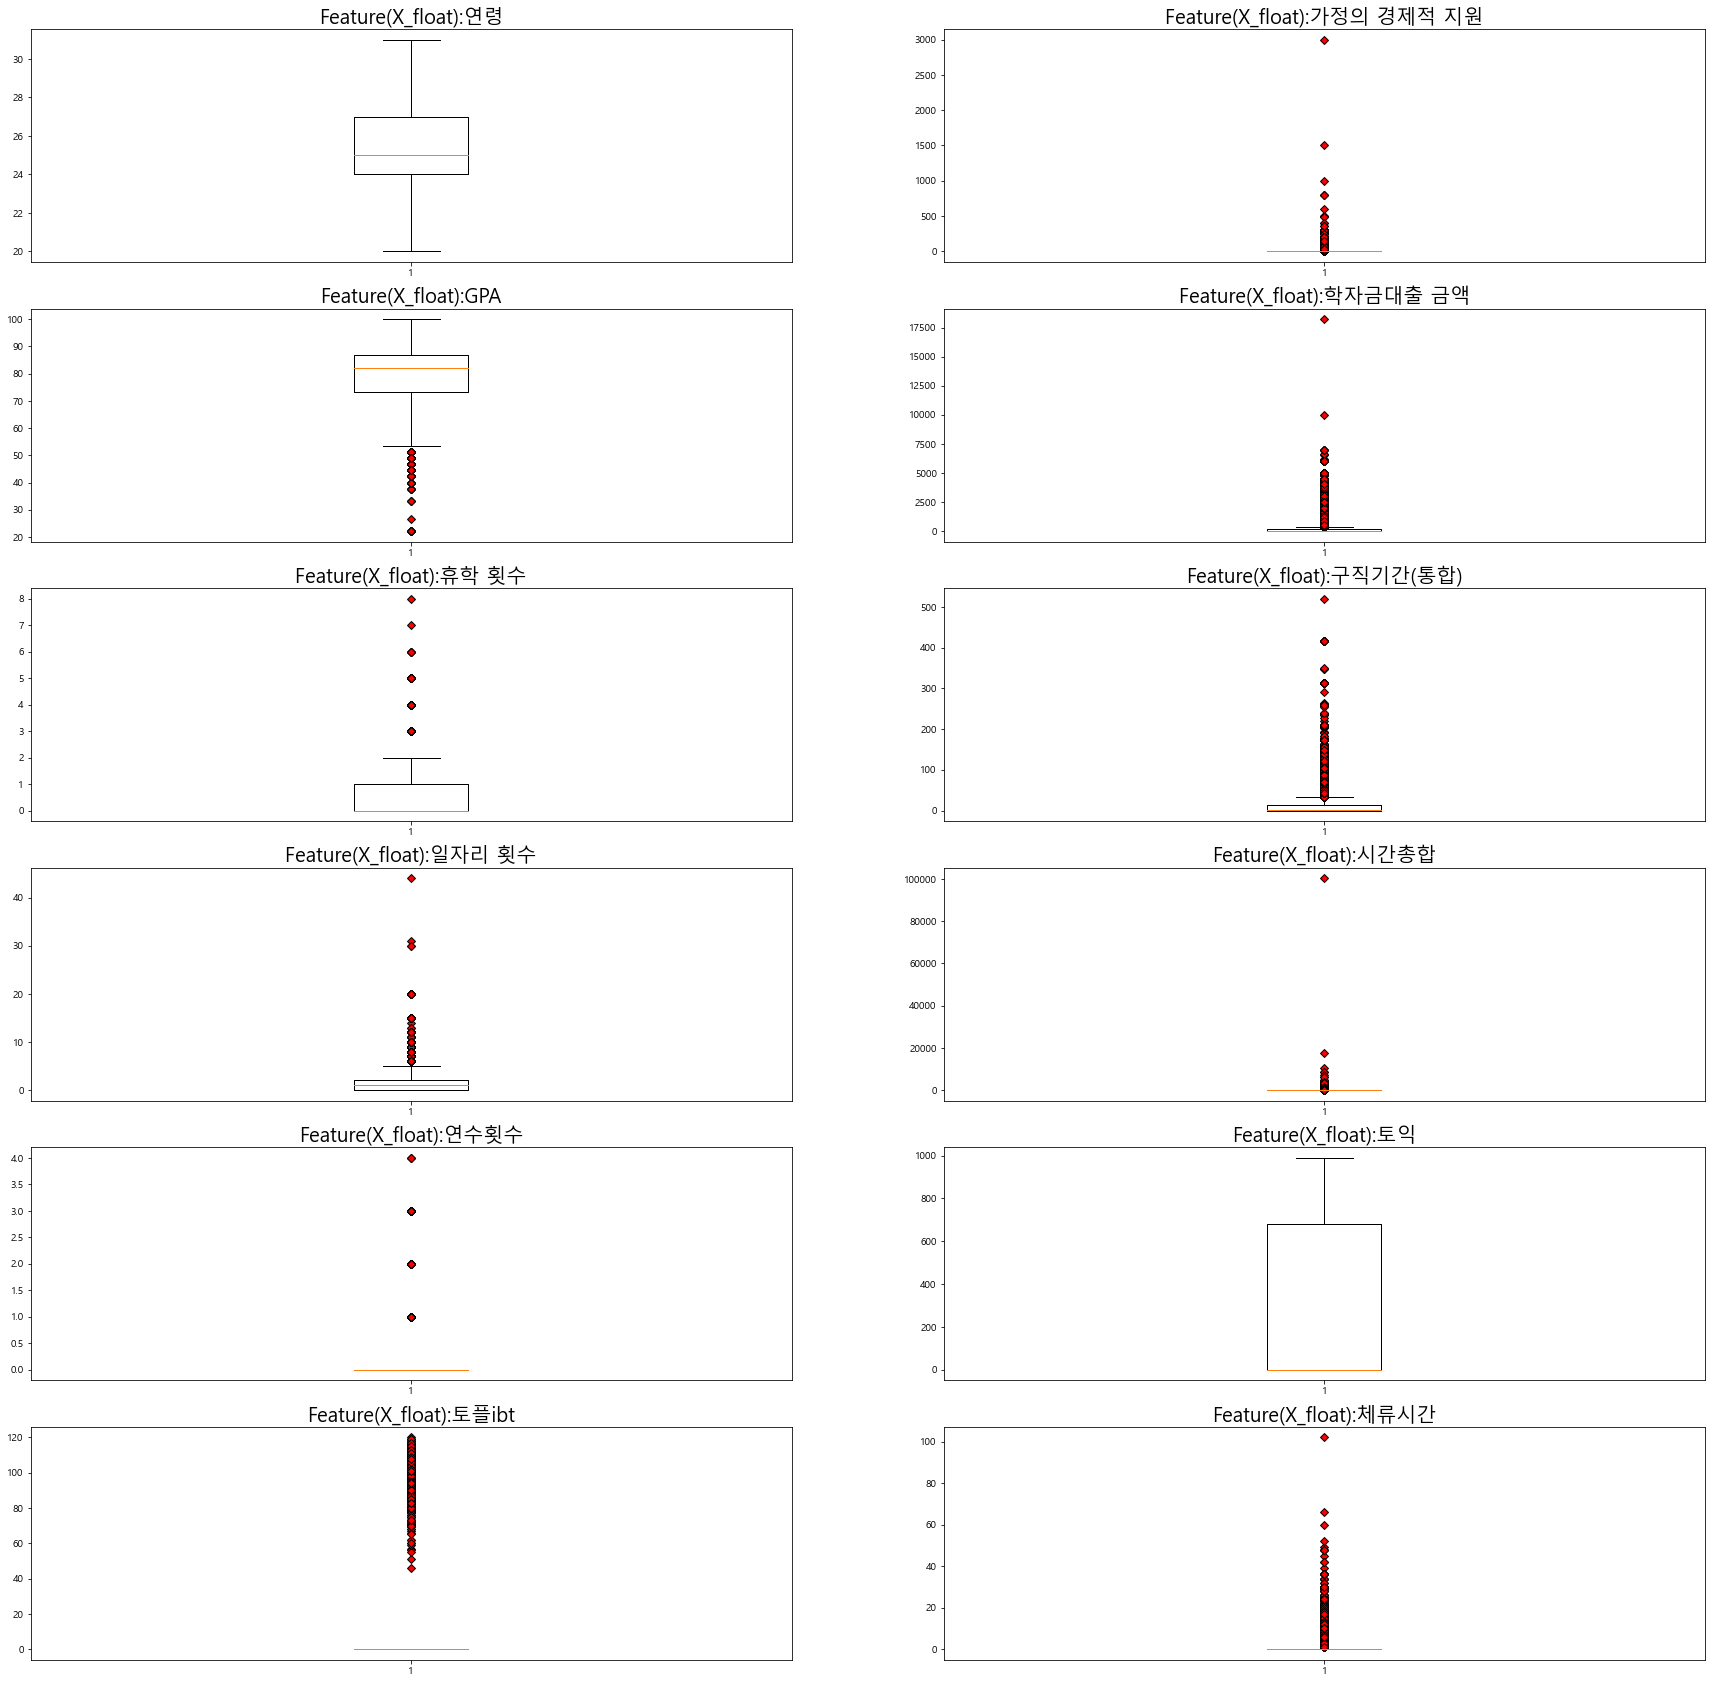

In [54]:
boxplot_vis(X_float, 'X_float')

In [9]:
df['연령'] = remove_outlier(df['연령'])
df.isnull().sum()

본분교                           0
국공사립                          0
학위과정유형                        0
주야간                           0
전공계열                          0
전공_소분류_코드                     0
학교유형                          0
학교소재지역                        0
성별                            0
연령                         2122
혼인여부 및 배우자 학력                 0
아버지 학력                        0
어머니 학력                        0
부모님 소득                        0
부모님 자산                        0
가정의 경제적 지원                    0
대학 입학 구분                      0
진로 선택 및 취업준비 프로그램 참여 횟수       0
GPA                           0
학자금대출 금액                      0
휴학 횟수                         0
석사/박사 재학여부                    0
구직기간(통합)                      0
건강한정도                         0
재학중 일자리 경험                    0
일자리 횟수                        0
시간총합                          0
연수횟수                          0
토익                            0
토스등급                          0
오픽점수                          0
토플ibt   

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

본분교                        0
국공사립                       0
학위과정유형                     0
주야간                        0
전공계열                       0
전공_소분류_코드                  0
학교유형                       0
학교소재지역                     0
성별                         0
연령                         0
혼인여부 및 배우자 학력              0
아버지 학력                     0
어머니 학력                     0
부모님 소득                     0
부모님 자산                     0
가정의 경제적 지원                 0
대학 입학 구분                   0
진로 선택 및 취업준비 프로그램 참여 횟수    0
GPA                        0
학자금대출 금액                   0
휴학 횟수                      0
석사/박사 재학여부                 0
구직기간(통합)                   0
건강한정도                      0
재학중 일자리 경험                 0
일자리 횟수                     0
시간총합                       0
연수횟수                       0
토익                         0
토스등급                       0
오픽점수                       0
토플ibt                      0
탭스                         0
체류시간                       0
취업여부          

In [12]:
df.shape

(49568, 35)

In [13]:
y = df['취업여부']
X = df.drop(columns=['취업여부'])

In [14]:
# 연령에 대해서 이상치 제거

In [15]:
from imblearn.over_sampling import SMOTE

X_train , X_test , y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=0 , stratify=y)

smote = SMOTE(random_state=0)
X_train_over , y_train_over = smote.fit_resample(X_train, y_train)



In [16]:
X_train_first , X_val , y_train_first , y_val = train_test_split(X_train_over , y_train_over , random_state=0 , test_size=0.25) 

- 최종 테스트 : X_test , y_test
- 훈련 전체 : X_train_over , y_train_over
- 훈련 - > 검증 : X_train_first , y_train_first
- 검증용 : X_val , y_val

# Classifier 모델링 함수

## 기본 모델 학습 함수

In [17]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=0)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

## 하이퍼파라미터별 모델 성능 시각화 함수

In [18]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
#     plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

## 모델 최적화 함수: 학습할 트리 모델 개수 선정

In [19]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=0)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 최대 깊이 선정

In [20]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=0)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=0)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 분리 노드의 최소 자료 수 선정

In [21]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 0)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 0)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 잎사귀 노드의 최소 자료 수 선정

In [22]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=0)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=0)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

## 최종 모델 학습

In [23]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=0, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 0, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
#     model_path = '../model/'
#     model_filename = 'wine_classification_' + algorithm_name + '.pkl'
#     with open(model_path + model_filename, 'wb') as f:
#         pickle.dump(model, f)
#     print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(40, 40))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
#     plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    plt.figure(figsize =(40, 40))
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    
    plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
#     plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

# Random Forest Classifier 기반 분류 모델 성능 평가

In [24]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

## 기본 모델 학습

In [25]:
# XGB로 확인

from xgboost import XGBClassifier
xgb1 = XGBClassifier(random_state = 0)

xgb1.fit(X_train_first , y_train_first)
pred = xgb1.predict(X_val)

print(accuracy_score(pred, y_val))

[11:35:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9174910961614563


In [26]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          X_train_first,
                                                          y_train_first,
                                                          X_val,
                                                          y_val)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.894


### 해석

- 학습 데이터 기반 분류 모델의 정확도가 100%인 것으로 미루어 보아 과대적합이 발생한 것으로 보임
- 하이퍼파라미터 튜닝을 통해 과대적합을 방지할 수 있도록 조치가 필요함

## 모델 최적화: (1) 학습할 트리 개수 선정

    n_estimators  TrainScore  TestScore
0              5      0.9833     0.8562
1             10      0.9948     0.8695
2             15      0.9975     0.8802
3             20      0.9987     0.8850
4             25      0.9993     0.8865
5             30      0.9994     0.8903
6             35      0.9994     0.8894
7             40      0.9996     0.8905
8             45      0.9998     0.8904
9             50      0.9998     0.8910
10            55      0.9999     0.8907
11            60      1.0000     0.8917
12            65      1.0000     0.8917
13            70      1.0000     0.8934
14            75      1.0000     0.8934
15            80      1.0000     0.8942
16            85      1.0000     0.8939
17            90      1.0000     0.8946
18            95      1.0000     0.8942


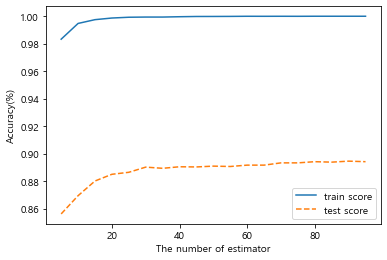

In [53]:
# n_estimators : 5, 10 , 15, 20, 25, 30, 35, 40



n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                  X_train_first,y_train_first,
                  X_val, y_val,
                 n_estimator_min, n_estimator_max)

## 모델 최적화: (2) 최대 깊이

    depth  TrainScore  TestScore
0       1      0.7720     0.7705
1       2      0.7832     0.7815
2       3      0.7907     0.7900
3       4      0.8050     0.8054
4       5      0.8186     0.8178
5       6      0.8207     0.8184
6       7      0.8274     0.8248
7       8      0.8388     0.8326
8       9      0.8481     0.8405
9      10      0.8575     0.8431
10     11      0.8693     0.8513
11     12      0.8771     0.8527
12     13      0.8915     0.8606
13     14      0.9006     0.8631
14     15      0.9136     0.8648
15     16      0.9283     0.8717
16     17      0.9410     0.8731
17     18      0.9549     0.8769
18     19      0.9667     0.8815
19     20      0.9750     0.8836


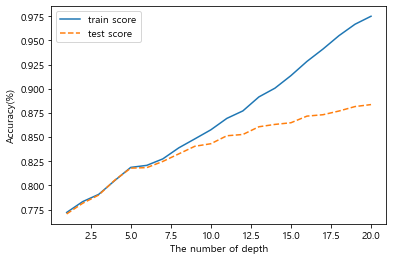

In [54]:
# n_estimators = 40으로 사용


# max_depth는 5 , 6 ,7,8,9 
# 뒤에 parameter도 계속 활용할지 고려

# max_depth : 5

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_first,y_train_first,
                  X_val, y_val, 
                depth_min, depth_max, 40)

    depth  TrainScore  TestScore
0       1      0.7775     0.7753
1       2      0.7826     0.7820
2       3      0.7878     0.7868
3       4      0.7988     0.7996
4       5      0.8114     0.8099
5       6      0.8134     0.8118
6       7      0.8248     0.8217
7       8      0.8356     0.8281
8       9      0.8478     0.8387
9      10      0.8573     0.8433
10     11      0.8703     0.8522
11     12      0.8772     0.8511
12     13      0.8917     0.8595
13     14      0.9021     0.8629
14     15      0.9130     0.8645
15     16      0.9272     0.8688
16     17      0.9397     0.8727
17     18      0.9537     0.8760
18     19      0.9651     0.8807
19     20      0.9742     0.8827


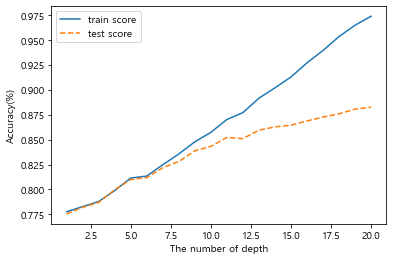

In [56]:
# n_estimators = 30으로 사용


# max_depth는 5 , 6 ,7,8,9 
# 뒤에 parameter도 계속 활용할지 고려

# max_depth : 5

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_first,y_train_first,
                  X_val, y_val, 
                depth_min, depth_max, 30)

## 모델 최적화: (3) 분리 노드의 최소 자료 수 선정

    min_samples_split  TrainScore  TestScore
0                   2      0.8186     0.8178
1                   4      0.8187     0.8180
2                   6      0.8187     0.8180
3                   8      0.8187     0.8180
4                  10      0.8187     0.8184
5                  12      0.8186     0.8182
6                  14      0.8189     0.8187
7                  16      0.8189     0.8184
8                  18      0.8186     0.8183
9                  20      0.8197     0.8190
10                 22      0.8197     0.8192
11                 24      0.8197     0.8192
12                 26      0.8196     0.8193
13                 28      0.8194     0.8194
14                 30      0.8193     0.8193
15                 32      0.8189     0.8179
16                 34      0.8189     0.8179
17                 36      0.8189     0.8180
18                 38      0.8189     0.8180
19                 40      0.8188     0.8180
20                 42      0.8188     0.8180
21        

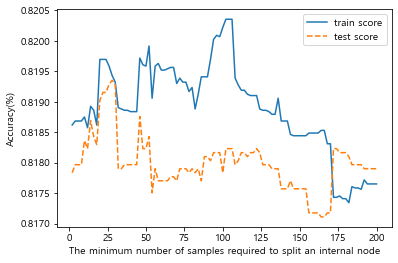

In [55]:
# n_estimators : 40
# max_depth : 5

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first,y_train_first,
                  X_val, y_val, 
                 
                 n_split_min, n_split_max, 40, 5)

    min_samples_split  TrainScore  TestScore
0                   2      0.9750     0.8836
1                   4      0.9618     0.8793
2                   6      0.9508     0.8801
3                   8      0.9428     0.8777
4                  10      0.9352     0.8785
5                  12      0.9303     0.8742
6                  14      0.9249     0.8751
7                  16      0.9212     0.8721
8                  18      0.9192     0.8744
9                  20      0.9145     0.8711
10                 22      0.9127     0.8709
11                 24      0.9106     0.8720
12                 26      0.9077     0.8701
13                 28      0.9056     0.8721
14                 30      0.9047     0.8717
15                 32      0.9030     0.8703
16                 34      0.9015     0.8685
17                 36      0.9000     0.8683
18                 38      0.8957     0.8660
19                 40      0.8966     0.8674
20                 42      0.8933     0.8662
21        

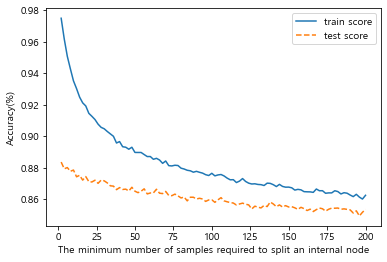

In [57]:
# n_estimators : 40
# max_depth : 20

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first,y_train_first,
                  X_val, y_val, 
                 
                 n_split_min, n_split_max, 40, 20)

## 모델 최적화: (4) 잎사귀 노드의 최소 자료 수 선정

    min_samples_leaf  TrainScore  TestScore
0                  2      0.8187     0.8180
1                  4      0.8187     0.8178
2                  6      0.8190     0.8183
3                  8      0.8190     0.8184
4                 10      0.8190     0.8184
5                 12      0.8190     0.8185
6                 14      0.8191     0.8188
7                 16      0.8190     0.8186
8                 18      0.8190     0.8184
9                 20      0.8189     0.8180
10                22      0.8176     0.8167
11                24      0.8187     0.8176
12                26      0.8188     0.8172
13                28      0.8193     0.8180
14                30      0.8190     0.8172
15                32      0.8193     0.8180
16                34      0.8195     0.8182
17                36      0.8189     0.8174
18                38      0.8188     0.8175
19                40      0.8187     0.8176
20                42      0.8189     0.8178
21                44      0.8189

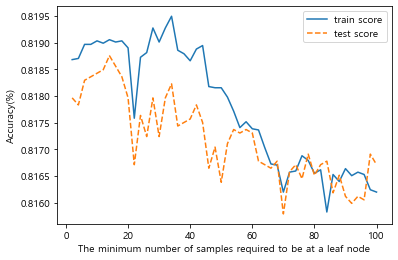

In [59]:


n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_first,y_train_first,
                  X_val, y_val, 
               n_leaf_min, n_leaf_max, 40, 5, 2)

In [75]:
from sklearn.model_selection import GridSearchCV


params = {'n_estimators':[5, 10 , 15, 20, 25, 30, 35, 40],
         'max_depth' : [5 , 6 ,7,8,9 ,10, 20],
         'min_samples_split' : [2,3,4] , 
 
          'min_samples_leaf' : [1,2,3,4]}

rf = RFC(random_state=0)

grid_cv = GridSearchCV(rf , param_grid=params , cv=5 , n_jobs=-1)

grid_cv.fit(X_train , y_train)


print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv.best_params_)
print('최고 예측 정확도 : ' , grid_cv.best_score_)


GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
최고 예측 정확도 :  0.8657638430326637


In [76]:
from sklearn.metrics import accuracy_score, recall_score , precision_score , f1_score , roc_auc_score

rf_best = grid_cv.best_estimator_

pred = grid_cv.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test , pred)
roc = roc_auc_score(y_test, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.8658462779907202
재현율: RandomForestClassifier 0.9569977575517742
정밀도: RandomForestClassifier 0.8784356459619809
F1: RandomForestClassifier 0.9160353535353536
roc_auc_score: RandomForestClassifier 0.7633252825478545


## 최종 모델 학습


Accuracy: 0.884
Precision: 0.843
Recall: 0.939
F1-score: 0.889


<Figure size 2160x2160 with 0 Axes>

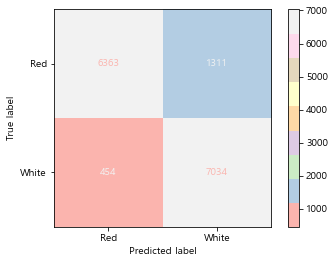

                    Feature  Importance
15               가정의 경제적 지원       0.299
9                        연령       0.063
25                   일자리 횟수       0.057
22                 구직기간(통합)       0.053
18                      GPA       0.048
5                 전공_소분류_코드       0.043
13                   부모님 소득       0.039
23                    건강한정도       0.032
14                   부모님 자산       0.031
7                    학교소재지역       0.031
11                   아버지 학력       0.026
21               석사/박사 재학여부       0.026
17  진로 선택 및 취업준비 프로그램 참여 횟수       0.026
24               재학중 일자리 경험       0.026
12                   어머니 학력       0.022
28                       토익       0.022
4                      전공계열       0.022
1                      국공사립       0.021
26                     시간총합       0.020
19                 학자금대출 금액       0.017
8                        성별       0.013
20                    휴학 횟수       0.012
33                     체류시간       0.009
29                     토스등급       0.007


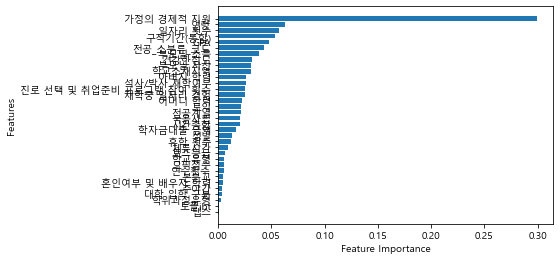

In [63]:
# train_set 이랑 validation set

model_final(algorithm, algorithm_name, X.columns,
             X_train_first,y_train_first,
                  X_val, y_val,
            40, 20, 2, 1)

Accuracy: 0.854
Precision: 0.882
Recall: 0.933
F1-score: 0.907


<Figure size 2160x2160 with 0 Axes>

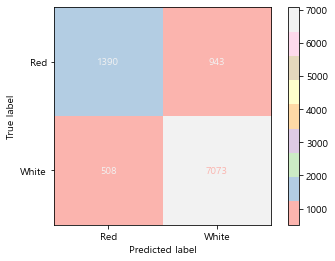

                    Feature  Importance
15               가정의 경제적 지원       0.308
9                        연령       0.060
22                 구직기간(통합)       0.053
25                   일자리 횟수       0.053
18                      GPA       0.048
5                 전공_소분류_코드       0.043
13                   부모님 소득       0.039
23                    건강한정도       0.032
14                   부모님 자산       0.030
7                    학교소재지역       0.029
11                   아버지 학력       0.027
21               석사/박사 재학여부       0.026
24               재학중 일자리 경험       0.026
17  진로 선택 및 취업준비 프로그램 참여 횟수       0.024
28                       토익       0.022
12                   어머니 학력       0.022
4                      전공계열       0.020
26                     시간총합       0.020
1                      국공사립       0.020
19                 학자금대출 금액       0.017
8                        성별       0.012
20                    휴학 횟수       0.012
33                     체류시간       0.010
29                     토스등급       0.007


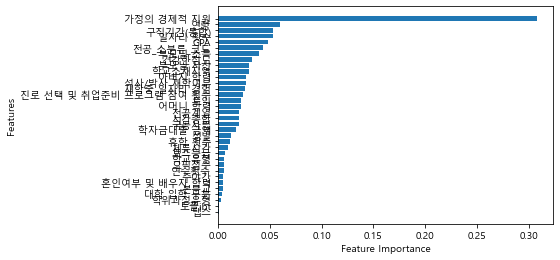

In [70]:
# 전체 훈련 세트 -> 테스트 세트

model_final(algorithm, algorithm_name, X.columns,
             X_train_over,y_train_over,
                  X_test, y_test,
            40, 20, 2, 1)

Accuracy: 0.853
Precision: 0.883
Recall: 0.931
F1-score: 0.906


<Figure size 2160x2160 with 0 Axes>

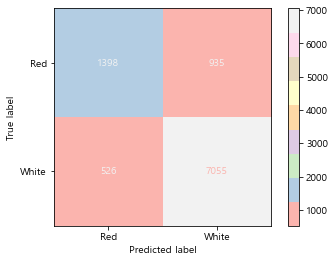

                    Feature  Importance
15               가정의 경제적 지원       0.299
9                        연령       0.063
25                   일자리 횟수       0.057
22                 구직기간(통합)       0.053
18                      GPA       0.048
5                 전공_소분류_코드       0.043
13                   부모님 소득       0.039
23                    건강한정도       0.032
14                   부모님 자산       0.031
7                    학교소재지역       0.031
11                   아버지 학력       0.026
21               석사/박사 재학여부       0.026
17  진로 선택 및 취업준비 프로그램 참여 횟수       0.026
24               재학중 일자리 경험       0.026
12                   어머니 학력       0.022
28                       토익       0.022
4                      전공계열       0.022
1                      국공사립       0.021
26                     시간총합       0.020
19                 학자금대출 금액       0.017
8                        성별       0.013
20                    휴학 횟수       0.012
33                     체류시간       0.009
29                     토스등급       0.007


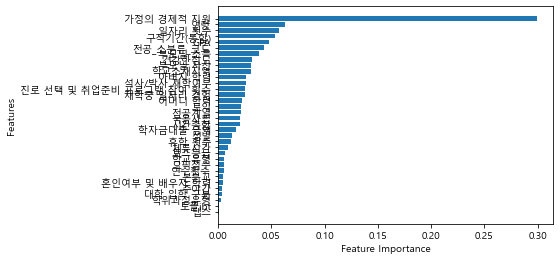

In [77]:
# 분할된 훈련 세트 -> 테스트 세트

model_final(algorithm, algorithm_name, X.columns,
             X_train_first,y_train_first,
                  X_test, y_test,
            40, 20, 2, 1)

# 가정의 경제적 지원 제외하고 진행

In [27]:
from imblearn.over_sampling import SMOTE

X2 = X.drop(columns=['가정의 경제적 지원'])

X_train2 , X_test2 , y_train2, y_test2 = train_test_split(X2, y , test_size=0.2 , random_state=0 , stratify=y)

smote = SMOTE(random_state=0)
X_train_over2 , y_train_over2 = smote.fit_resample(X_train2, y_train2)

X_train_first2 , X_val2 , y_train_first2 , y_val2 = train_test_split(X_train_over2 , y_train_over2 , random_state=0 , test_size=0.25) 

- 최종 테스트 : X_test2 , y_test2
- 훈련 전체 : X_train_over2 , y_train_over2
- 훈련 - > 검증 : X_train_first2 , y_train_first2
- 검증용 : X_val2 , y_val2

In [28]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          X_train_first2,
                                                          y_train_first2,
                                                          X_val2,
                                                          y_val2)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.84


In [29]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          X_train2,
                                                          y_train2,
                                                          X_test2,
                                                          y_test2)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.786


## 모델 최적화: (1) 학습할 트리 개수 선정

    n_estimators  TrainScore  TestScore
0              5      0.9786     0.7811
1             10      0.9942     0.8008
2             15      0.9977     0.8178
3             20      0.9993     0.8221
4             25      0.9996     0.8290
5             30      0.9998     0.8304
6             35      0.9998     0.8339
7             40      1.0000     0.8337
8             45      0.9999     0.8357
9             50      1.0000     0.8379
10            55      1.0000     0.8361
11            60      1.0000     0.8372
12            65      1.0000     0.8374
13            70      1.0000     0.8384
14            75      1.0000     0.8387
15            80      1.0000     0.8386
16            85      1.0000     0.8401
17            90      1.0000     0.8393
18            95      1.0000     0.8414


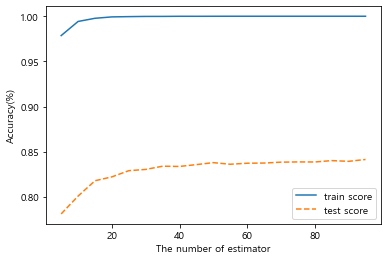

In [72]:
# n_estimators : 5, 10 , 15, 20, 25, 30, 35, 40

# 우선 35로 선택

n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                  X_train_first2,y_train_first2,
                  X_val2, y_val2,
                 n_estimator_min, n_estimator_max)

## 모델 최적화: (2) 최대 깊이

    depth  TrainScore  TestScore
0       1      0.6751     0.6723
1       2      0.6880     0.6861
2       3      0.6966     0.6966
3       4      0.7155     0.7114
4       5      0.7318     0.7289
5       6      0.7395     0.7312
6       7      0.7566     0.7454
7       8      0.7717     0.7569
8       9      0.7827     0.7624
9      10      0.7999     0.7710
10     11      0.8151     0.7772
11     12      0.8358     0.7850
12     13      0.8546     0.7871
13     14      0.8742     0.7956
14     15      0.8941     0.8002
15     16      0.9147     0.8027
16     17      0.9293     0.8108
17     18      0.9456     0.8139
18     19      0.9597     0.8129
19     20      0.9708     0.8185


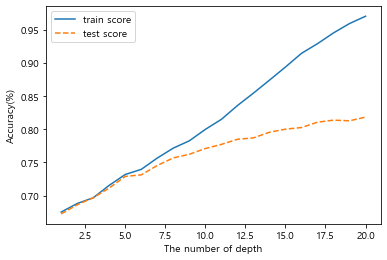

In [80]:
# n_estimator : 35로 진행

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                depth_min, depth_max, 35)

    depth  TrainScore  TestScore
0       1      0.6293     0.6340
1       2      0.6586     0.6619
2       3      0.6763     0.6797
3       4      0.6925     0.6914
4       5      0.7199     0.7200
5       6      0.7285     0.7229
6       7      0.7445     0.7359
7       8      0.7588     0.7419
8       9      0.7703     0.7494
9      10      0.7867     0.7556
10     11      0.8051     0.7669
11     12      0.8235     0.7730
12     13      0.8453     0.7775
13     14      0.8621     0.7829
14     15      0.8804     0.7862
15     16      0.9026     0.7908
16     17      0.9163     0.7903
17     18      0.9281     0.7992
18     19      0.9436     0.7942
19     20      0.9561     0.7988


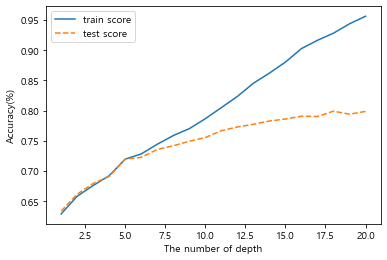

In [81]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                depth_min, depth_max, 10)

## 모델 최적화: (3) 분리 노드의 최소 자료 수 선정    

    min_samples_split  TrainScore  TestScore
0                   2      0.9728     0.8233
1                   4      0.9657     0.8211
2                   6      0.9556     0.8194
3                   8      0.9458     0.8153
4                  10      0.9369     0.8166
5                  12      0.9310     0.8159
6                  14      0.9205     0.8124
7                  16      0.9161     0.8157
8                  18      0.9119     0.8136
9                  20      0.9052     0.8126
10                 22      0.9020     0.8135
11                 24      0.8972     0.8115
12                 26      0.8941     0.8100
13                 28      0.8908     0.8106
14                 30      0.8848     0.8063
15                 32      0.8844     0.8119
16                 34      0.8793     0.8081
17                 36      0.8791     0.8064
18                 38      0.8755     0.8039
19                 40      0.8713     0.8037
20                 42      0.8709     0.8079
21        

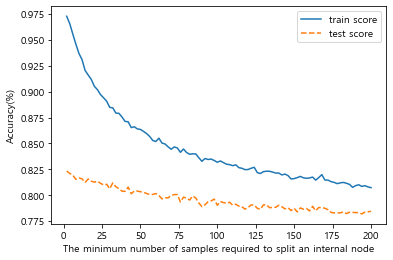

In [69]:
# n_estimator 35 , max_depth 5로 지정

# min_samples_split : 116 -> 52

# 4 , 6, 8, 10, 12 , 30 , 52, 54

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                 
                 n_split_min, n_split_max, 40, 20)

## 모델 최적화: (4) 잎사귀 노드의 최소 자료 수 선정

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9237     0.8719
1                  4      0.9113     0.8689
2                  6      0.9031     0.8692
3                  8      0.8954     0.8618
4                 10      0.8883     0.8626
5                 12      0.8827     0.8619
6                 14      0.8792     0.8584
7                 16      0.8749     0.8549
8                 18      0.8730     0.8559
9                 20      0.8691     0.8513
10                22      0.8661     0.8493
11                24      0.8638     0.8511
12                26      0.8628     0.8484
13                28      0.8603     0.8469
14                30      0.8589     0.8465
15                32      0.8596     0.8453
16                34      0.8581     0.8462
17                36      0.8549     0.8458
18                38      0.8526     0.8430
19                40      0.8515     0.8434
20                42      0.8539     0.8440
21                44      0.8515

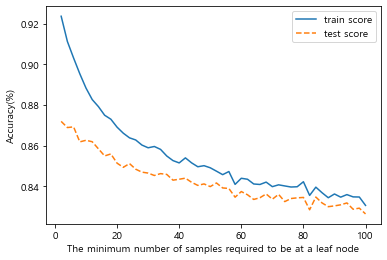

In [70]:
# 최소 자료수 32로 선정

# 2 , 14 , 32, 34

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_first,y_train_first,
                  X_val, y_val, 
               n_leaf_min, n_leaf_max, 40, 20, 12)

In [78]:
# 최종 모델

import time 
start = time.time()


params = {'n_estimators':[5, 10 , 15, 20, 25, 30, 35, 40],
         'max_depth' : [5 , 6 ,7 , 8, 20],
         'min_samples_split' : [2, 4 , 6, 8, 10, 12 , 30 , 52, 54] , 
 
          'min_samples_leaf' : [1, 2 , 14 , 32, 34]}

rf = RFC(random_state=0)

grid_cv = GridSearchCV(rf , param_grid=params , cv=5 , n_jobs=-1)

grid_cv.fit(X_train2 , y_train2)


print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv.best_params_)
print('최고 예측 정확도 : ' , grid_cv.best_score_)

print(time.time() - start)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 40}
최고 예측 정확도 :  0.7813587367590232
781.6077456474304


In [87]:
rf_best = grid_cv.best_estimator_

pred = grid_cv.best_estimator_.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.7809158765382288
재현율: RandomForestClassifier 0.976915974145891
정밀도: RandomForestClassifier 0.7876209720302031
F1: RandomForestClassifier 0.872114931700424
roc_auc_score: RandomForestClassifier 0.560468274256829


In [90]:
rf = RFC(n_estimators=40 , max_depth=20 , min_samples_split=2 , min_samples_leaf=1)

rf.fit(X_train_first2 , y_train_first2)

pred = rf.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.7348194472463183
재현율: RandomForestClassifier 0.8451391636987204
정밀도: RandomForestClassifier 0.8149325871279572
F1: RandomForestClassifier 0.8297610567894839
roc_auc_score: RandomForestClassifier 0.6107393203834366


In [77]:

import time 
start = time.time() 
print('hi') 
print(time.time() - start)



hi
0.0


# Train : Test dataset으로만 진행

    n_estimators  TrainScore  TestScore
0              5      0.9686     0.7538
1             10      0.9922     0.7609
2             15      0.9946     0.7762
3             20      0.9980     0.7768
4             25      0.9980     0.7785
5             30      0.9992     0.7793
6             35      0.9991     0.7783
7             40      0.9996     0.7817
8             45      0.9997     0.7828
9             50      0.9999     0.7844
10            55      0.9998     0.7840
11            60      0.9999     0.7847
12            65      0.9999     0.7840
13            70      1.0000     0.7838
14            75      1.0000     0.7836
15            80      1.0000     0.7867
16            85      1.0000     0.7860
17            90      1.0000     0.7860
18            95      1.0000     0.7846


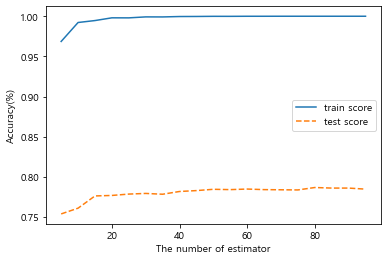

In [30]:
# n_estimator = 15,20,25,30,40,45,50

n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                  X_train2,y_train2,
                  X_test2, y_test2,
                 n_estimator_min, n_estimator_max)

    depth  TrainScore  TestScore
0       1      0.7647     0.7647
1       2      0.7647     0.7647
2       3      0.7647     0.7647
3       4      0.7709     0.7689
4       5      0.7728     0.7704
5       6      0.7732     0.7707
6       7      0.7745     0.7714
7       8      0.7758     0.7724
8       9      0.7781     0.7729
9      10      0.7826     0.7741
10     11      0.7893     0.7757
11     12      0.7978     0.7768
12     13      0.8095     0.7779
13     14      0.8217     0.7793
14     15      0.8394     0.7816
15     16      0.8543     0.7811
16     17      0.8697     0.7814
17     18      0.8847     0.7808
18     19      0.9043     0.7832
19     20      0.9192     0.7838


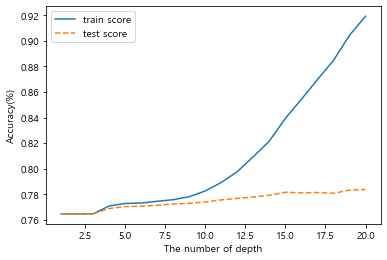

In [31]:
# n_estimator : 50로 진행

# depth : 4, 5,6,7,8,9,10

# depth : 6으로 진행

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train2,y_train2,
                  X_test2, y_test2, 
                depth_min, depth_max, 50)

    min_samples_split  TrainScore  TestScore
0                   2      0.7826     0.7741
1                   4      0.7828     0.7738
2                   6      0.7817     0.7739
3                   8      0.7810     0.7737
4                  10      0.7800     0.7732
5                  12      0.7802     0.7743
6                  14      0.7793     0.7740
7                  16      0.7794     0.7740
8                  18      0.7785     0.7728
9                  20      0.7791     0.7729
10                 22      0.7790     0.7740
11                 24      0.7793     0.7741
12                 26      0.7796     0.7748
13                 28      0.7784     0.7737
14                 30      0.7783     0.7747
15                 32      0.7782     0.7743
16                 34      0.7776     0.7741
17                 36      0.7779     0.7735
18                 38      0.7767     0.7726
19                 40      0.7771     0.7737
20                 42      0.7771     0.7740
21        

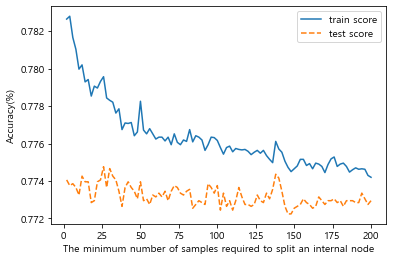

In [36]:
n_split_min = 1
n_split_max = 101

# n_split : 14, 16, 18, 26 , 50

# 26으로 설정

# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train2,y_train2,
                  X_test2, y_test2, 
                 
                 n_split_min, n_split_max, 50, 10)

    min_samples_leaf  TrainScore  TestScore
0                  2      0.7792     0.7744
1                  4      0.7787     0.7741
2                  6      0.7777     0.7749
3                  8      0.7777     0.7739
4                 10      0.7774     0.7739
5                 12      0.7765     0.7736
6                 14      0.7772     0.7740
7                 16      0.7771     0.7740
8                 18      0.7755     0.7727
9                 20      0.7764     0.7738
10                22      0.7756     0.7731
11                24      0.7749     0.7723
12                26      0.7748     0.7720
13                28      0.7752     0.7718
14                30      0.7745     0.7727
15                32      0.7741     0.7721
16                34      0.7741     0.7720
17                36      0.7744     0.7725
18                38      0.7735     0.7719
19                40      0.7735     0.7718
20                42      0.7738     0.7719
21                44      0.7733

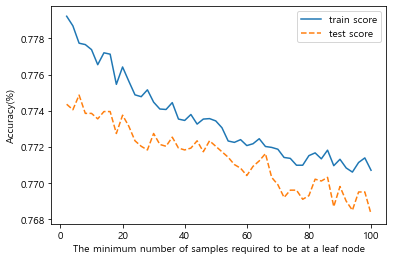

In [37]:
# n_leaf_split : 1, 2, 6, 14, 16


n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train2,y_train2,
                  X_test2, y_test2, 
               n_leaf_min, n_leaf_max, 50, 10, 26)

In [35]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[15,20,25,30,40,45,50],
         'max_depth' : [4, 5,6,7,8,9,10],
         'min_samples_split' : [14, 16, 18, 26 , 50] , 
 
          'min_samples_leaf' : [1, 2, 6, 14, 16]}

rf = RFC(random_state=0)

grid_cv = GridSearchCV(rf , param_grid=params , cv=5 , n_jobs=-1 , scoring='roc_auc')

grid_cv.fit(X_train2 , y_train2)


print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv.best_params_)
print('최고 예측 정확도 : ' , grid_cv.best_score_)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 18, 'n_estimators': 50}
최고 예측 정확도 :  0.7534693144023215


In [46]:
from sklearn.model_selection import GridSearchCV

params2 = {'n_estimators':[20,25,30,40,45,50],
         'max_depth' : [6,7,8,9,10 , 11],
         'min_samples_split' : [14, 16, 18, 26 , 50] , 
 
          'min_samples_leaf' : [1, 2, 6, 14, 16]}

rf = RFC(random_state=0)

grid_cv2 = GridSearchCV(rf , param_grid=params2 , cv=5 , n_jobs=-1 , scoring='roc_auc')

grid_cv2.fit(X_train2 , y_train2)


print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv2.best_params_)
print('최고 예측 roc_auc : ' , grid_cv2.best_score_)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 50}
최고 예측 roc_auc :  0.7581864300670518


In [47]:
rf_best2 = grid_cv2.best_estimator_

pred = grid_cv2.best_estimator_.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv2.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv2.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv2.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv2.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv2.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.7750655638491023
재현율: RandomForestClassifier 0.9947236512333465
정밀도: RandomForestClassifier 0.7749460487103073
F1: RandomForestClassifier 0.8711876155268022
roc_auc_score: RandomForestClassifier 0.5280090609360046


Accuracy: 0.774
Precision: 0.774
Recall: 0.995
F1-score: 0.871


<Figure size 2880x2880 with 0 Axes>

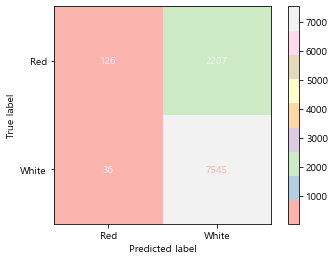

                    Feature  Importance
21                 구직기간(통합)       0.301
20               석사/박사 재학여부       0.102
14                   부모님 자산       0.090
13                   부모님 소득       0.073
5                 전공_소분류_코드       0.062
25                     시간총합       0.057
27                       토익       0.038
17                      GPA       0.034
4                      전공계열       0.031
7                    학교소재지역       0.022
9                        연령       0.021
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.019
22                    건강한정도       0.016
24                   일자리 횟수       0.016
18                 학자금대출 금액       0.014
8                        성별       0.014
6                      학교유형       0.012
11                   아버지 학력       0.011
19                    휴학 횟수       0.010
12                   어머니 학력       0.010
1                      국공사립       0.007
32                     체류시간       0.007
23               재학중 일자리 경험       0.007
28                     토스등급       0.006


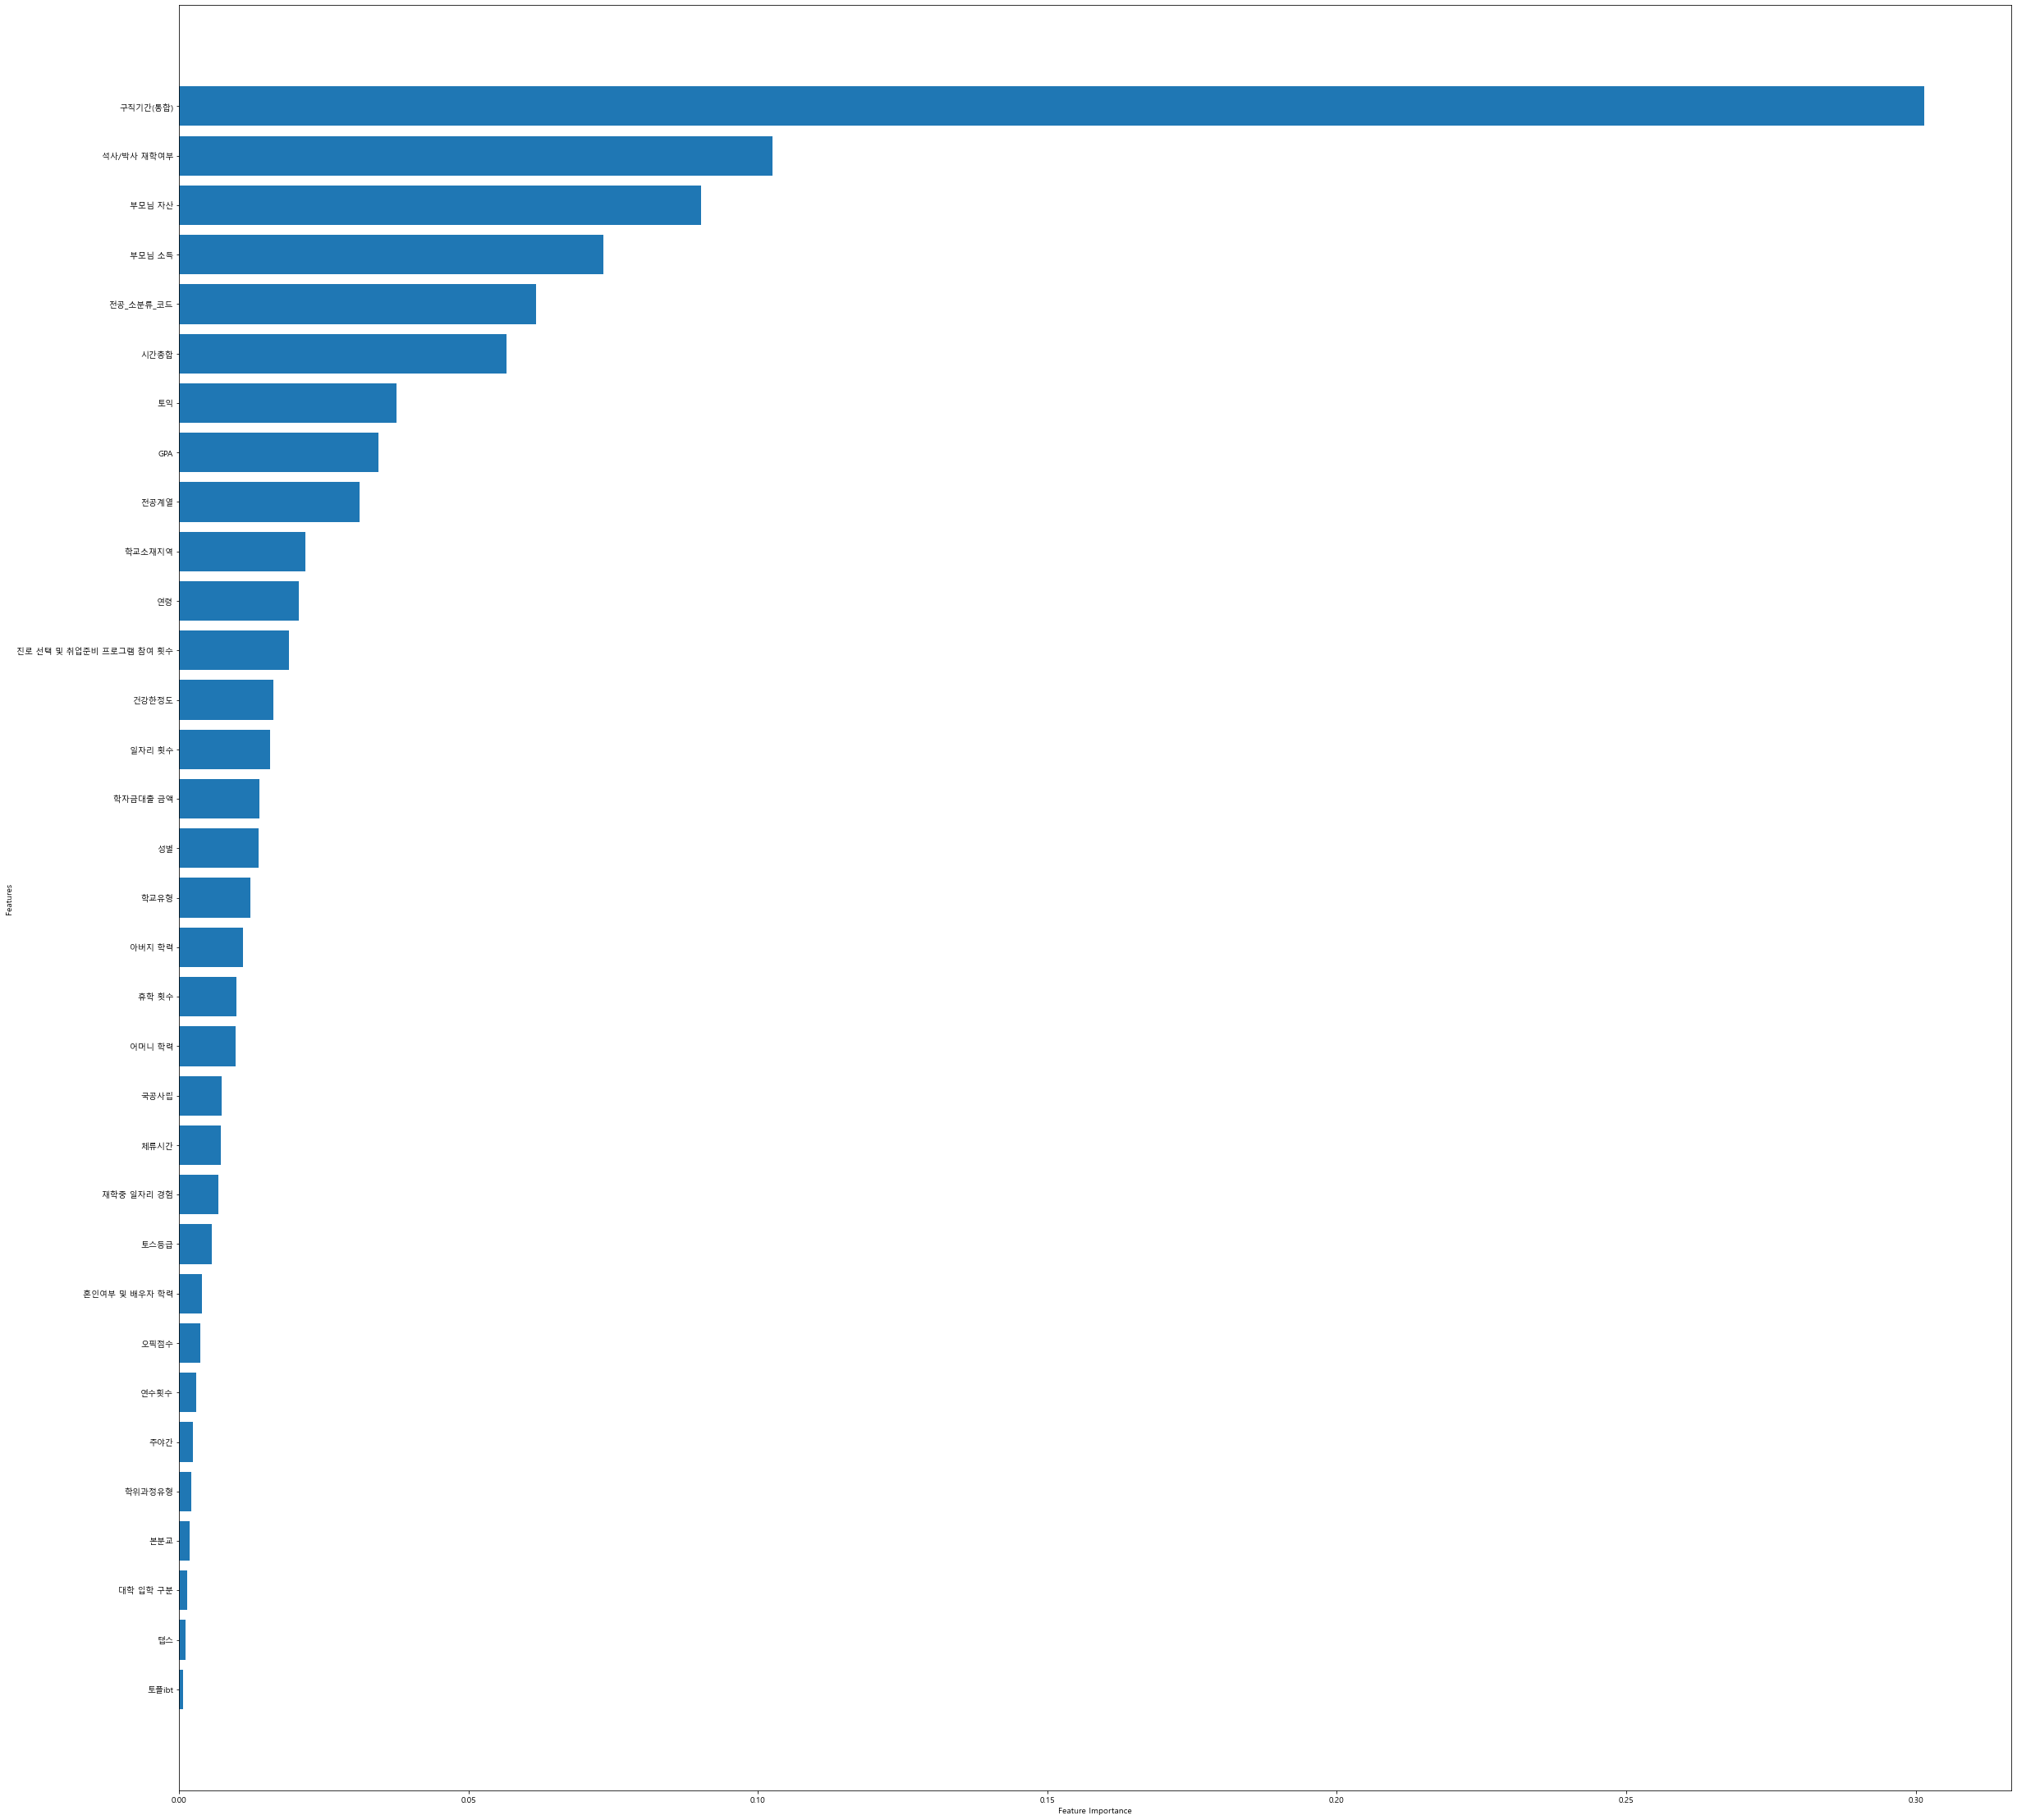

In [42]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train2,y_train2,
                  X_test2, y_test2,
            50, 10, 18, 6)

    min_samples_split  TrainScore  TestScore
0                   2      0.7596     0.7487
1                   4      0.7613     0.7486
2                   6      0.7594     0.7472
3                   8      0.7611     0.7496
4                  10      0.7599     0.7498
5                  12      0.7604     0.7502
6                  14      0.7591     0.7502
7                  16      0.7601     0.7488
8                  18      0.7581     0.7486
9                  20      0.7598     0.7486
10                 22      0.7608     0.7505
11                 24      0.7588     0.7474
12                 26      0.7594     0.7482
13                 28      0.7601     0.7501
14                 30      0.7614     0.7497
15                 32      0.7595     0.7477
16                 34      0.7581     0.7479
17                 36      0.7564     0.7461
18                 38      0.7568     0.7463
19                 40      0.7580     0.7486
20                 42      0.7588     0.7478
21        

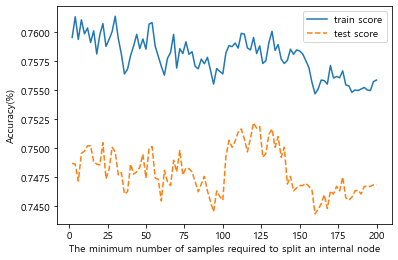

In [44]:
# n_estimators : 20, 25, 30, 35
# max_depth : 5,6,7,8

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                 
                 n_split_min, n_split_max, 35, 7)

# n_split :2, 110, 114 ,  120, 124, 132

# 120으로 진행

    min_samples_leaf  TrainScore  TestScore
0                  2      0.7583     0.7519
1                  4      0.7597     0.7516
2                  6      0.7600     0.7515
3                  8      0.7607     0.7522
4                 10      0.7590     0.7524
5                 12      0.7596     0.7524
6                 14      0.7595     0.7522
7                 16      0.7595     0.7514
8                 18      0.7606     0.7518
9                 20      0.7593     0.7510
10                22      0.7588     0.7504
11                24      0.7583     0.7498
12                26      0.7583     0.7479
13                28      0.7599     0.7496
14                30      0.7596     0.7482
15                32      0.7570     0.7473
16                34      0.7566     0.7468
17                36      0.7577     0.7483
18                38      0.7574     0.7490
19                40      0.7555     0.7486
20                42      0.7555     0.7485
21                44      0.7553

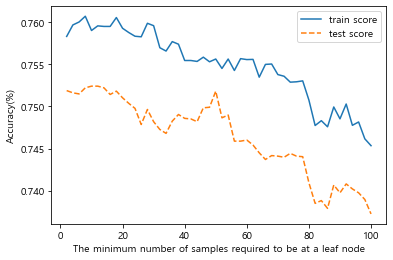

In [45]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_first2,y_train_first2,
                  X_val2, y_val2, 
               n_leaf_min, n_leaf_max, 35, 7, 120)
# n_leaf = 8, 10, 12, 14, 16 , 18, 50

In [49]:
params3 = {'n_estimators':[30,35],
         'max_depth' : [7,8],
         'min_samples_split' : [110, 114 ,  120, 124, 132] , 
 
          'min_samples_leaf' : [8, 10, 12, 14, 16 , 18, 50]}

rf = RFC(random_state=0)

grid_cv3 = GridSearchCV(rf , param_grid=params3 , cv=5 , n_jobs=-1 )

grid_cv3.fit(X_train2 , y_train2)


print(grid_cv3.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv3.best_params_)
print('최고 예측 정확도 : ' , grid_cv3.best_score_)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 124, 'n_estimators': 30}
최고 예측 정확도 :  0.7730367611061547


In [50]:
rf_best3 = grid_cv3.best_estimator_

pred = grid_cv3.best_estimator_.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv3.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv3.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv3.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv3.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv3.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.7708291305224935
재현율: RandomForestClassifier 0.997229916897507
정밀도: RandomForestClassifier 0.7705636530425033
F1: RandomForestClassifier 0.8693652253909844
roc_auc_score: RandomForestClassifier 0.5161888975829154


Accuracy: 0.754
Precision: 0.739
Recall: 0.776
F1-score: 0.757


<Figure size 2880x2880 with 0 Axes>

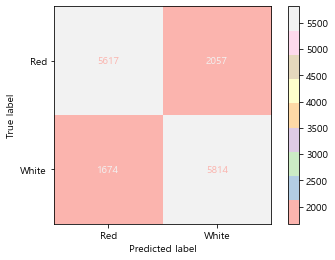

                    Feature  Importance
21                 구직기간(통합)       0.148
24                   일자리 횟수       0.107
9                        연령       0.096
23               재학중 일자리 경험       0.087
22                    건강한정도       0.077
20               석사/박사 재학여부       0.061
13                   부모님 소득       0.055
11                   아버지 학력       0.051
1                      국공사립       0.047
17                      GPA       0.039
12                   어머니 학력       0.039
8                        성별       0.033
14                   부모님 자산       0.029
4                      전공계열       0.019
25                     시간총합       0.017
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.016
5                 전공_소분류_코드       0.015
3                       주야간       0.012
27                       토익       0.009
19                    휴학 횟수       0.008
15                 대학 입학 구분       0.007
7                    학교소재지역       0.006
32                     체류시간       0.005
26                     연수횟수       0.004


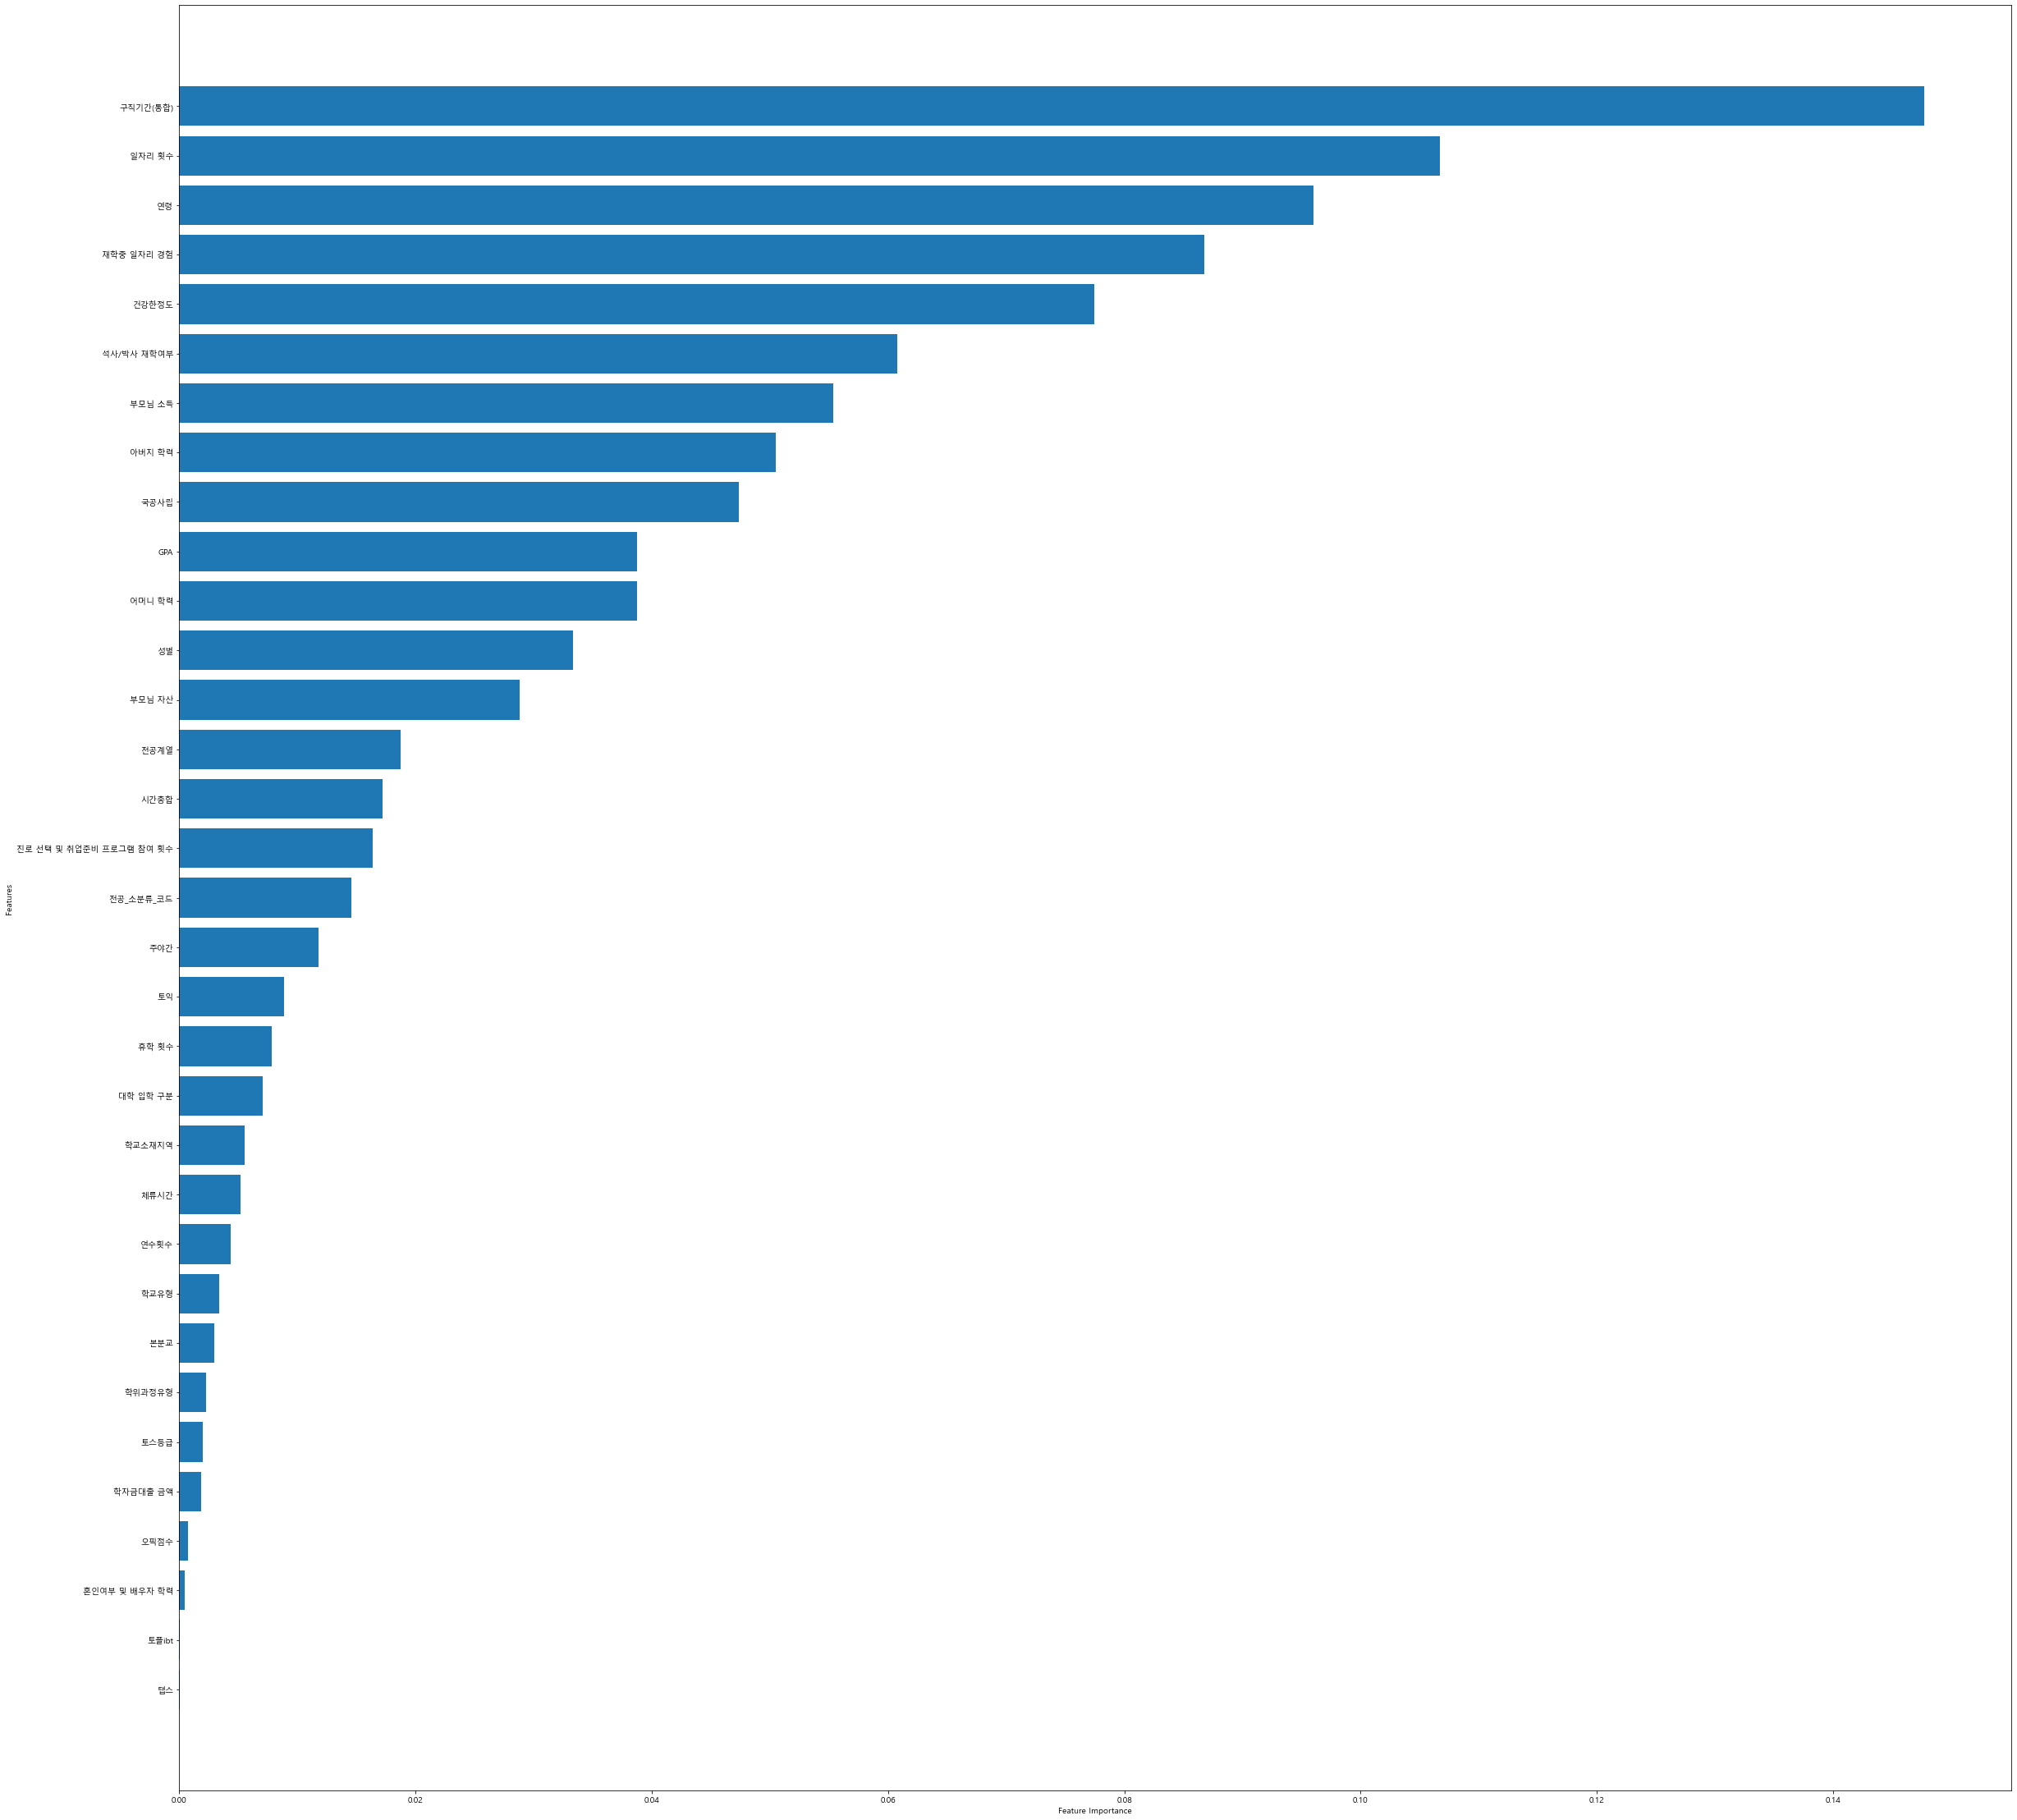

In [57]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_val2, y_val2,
            30, 7, 124, 8)

     n_estimators  TrainScore  TestScore
0             150         1.0     0.8390
1             155         1.0     0.8383
2             160         1.0     0.8380
3             165         1.0     0.8389
4             170         1.0     0.8383
..            ...         ...        ...
165           975         1.0     0.8398
166           980         1.0     0.8398
167           985         1.0     0.8396
168           990         1.0     0.8401
169           995         1.0     0.8401

[170 rows x 3 columns]


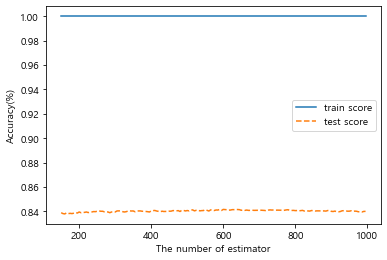

In [51]:
n_estimator_min = 30
n_estimator_max = 200
optimi_estimator(algorithm, algorithm_name, 
                  X_train_first2,y_train_first2,
                  X_val2, y_val2,
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5      0.9784     0.7771
1             10      0.9943     0.7986
2             15      0.9979     0.8212
3             20      0.9992     0.8217
4             25      0.9996     0.8298
5             30      0.9999     0.8324
6             35      0.9999     0.8331
7             40      0.9999     0.8357
8             45      0.9999     0.8366
9             50      0.9999     0.8376
10            55      1.0000     0.8380
11            60      1.0000     0.8368
12            65      1.0000     0.8380
13            70      1.0000     0.8395
14            75      1.0000     0.8396
15            80      1.0000     0.8406
16            85      1.0000     0.8402
17            90      1.0000     0.8406
18            95      1.0000     0.8399


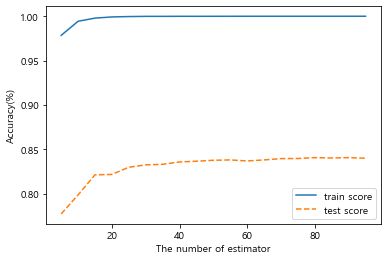

In [55]:
# 30,35,40,45,50

n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                  X_train_first2,y_train_first2,
                  X_val2, y_val2,
                 n_estimator_min, n_estimator_max)

    depth  TrainScore  TestScore
0       1      0.6790     0.6803
1       2      0.6850     0.6865
2       3      0.7075     0.7082
3       4      0.7252     0.7228
4       5      0.7347     0.7296
5       6      0.7535     0.7444
6       7      0.7610     0.7507
7       8      0.7735     0.7572
8       9      0.7880     0.7627
9      10      0.8046     0.7713
10     11      0.8242     0.7817
11     12      0.8397     0.7862
12     13      0.8600     0.7903
13     14      0.8809     0.7978
14     15      0.9034     0.8084
15     16      0.9203     0.8111
16     17      0.9393     0.8153
17     18      0.9564     0.8218
18     19      0.9676     0.8250
19     20      0.9777     0.8258


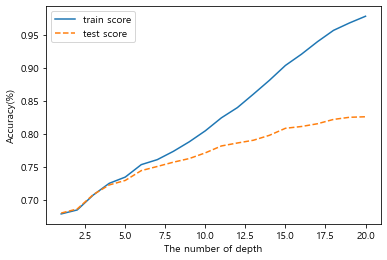

In [58]:
# 5,6,7

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                depth_min, depth_max, 100)

    min_samples_split  TrainScore  TestScore
0                   2      1.0000     0.8395
1                   4      0.9992     0.8335
2                   6      0.9936     0.8323
3                   8      0.9860     0.8331
4                  10      0.9760     0.8287
5                  12      0.9674     0.8285
6                  14      0.9585     0.8265
7                  16      0.9493     0.8234
8                  18      0.9422     0.8226
9                  20      0.9336     0.8223
10                 22      0.9295     0.8192
11                 24      0.9220     0.8190
12                 26      0.9170     0.8175
13                 28      0.9121     0.8199
14                 30      0.9071     0.8170
15                 32      0.9036     0.8153
16                 34      0.9000     0.8161
17                 36      0.8952     0.8150
18                 38      0.8937     0.8128
19                 40      0.8892     0.8133
20                 42      0.8866     0.8115
21        

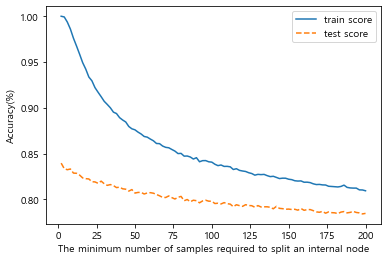

In [59]:
# 


n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                 
                 n_split_min, n_split_max, 100, None)

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9901     0.8322
1                  4      0.9412     0.8207
2                  6      0.9087     0.8159
3                  8      0.8857     0.8079
4                 10      0.8709     0.8031
5                 12      0.8601     0.7994
6                 14      0.8506     0.7982
7                 16      0.8428     0.7963
8                 18      0.8361     0.7919
9                 20      0.8316     0.7918
10                22      0.8272     0.7895
11                24      0.8231     0.7862
12                26      0.8193     0.7849
13                28      0.8175     0.7842
14                30      0.8126     0.7828
15                32      0.8113     0.7832
16                34      0.8093     0.7818
17                36      0.8071     0.7787
18                38      0.8057     0.7782
19                40      0.8018     0.7757
20                42      0.8011     0.7769
21                44      0.7989

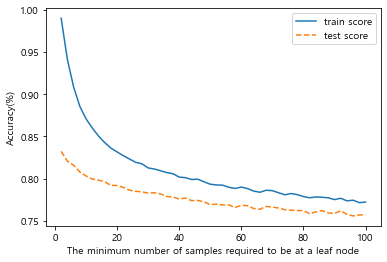

In [60]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_first2,y_train_first2,
                  X_val2, y_val2, 
               n_leaf_min, n_leaf_max, 100, None, 2)

    min_samples_split  TrainScore  TestScore
0                   2      0.7540     0.7458
1                   4      0.7533     0.7450
2                   6      0.7546     0.7454
3                   8      0.7537     0.7434
4                  10      0.7548     0.7440
5                  12      0.7551     0.7441
6                  14      0.7554     0.7448
7                  16      0.7559     0.7466
8                  18      0.7558     0.7467
9                  20      0.7556     0.7461
10                 22      0.7563     0.7460
11                 24      0.7555     0.7459
12                 26      0.7548     0.7457
13                 28      0.7550     0.7463
14                 30      0.7550     0.7460
15                 32      0.7551     0.7460
16                 34      0.7547     0.7459
17                 36      0.7551     0.7468
18                 38      0.7553     0.7463
19                 40      0.7553     0.7464
20                 42      0.7555     0.7467
21        

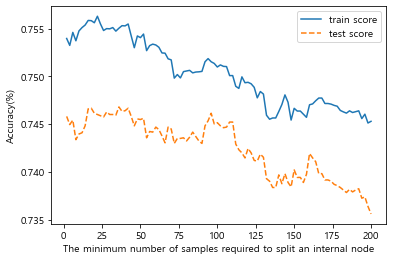

In [61]:
# n_split :  18 , 22 , 28, 36, 42

# 28, 36, 42 로 사용


# 2: 82
# 18 : 91
# 22 : 103
# 28 : 87
# 36 : 83
# 42 : 88

# 36으로 진행

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_first2,y_train_first2,
                  X_val2, y_val2, 
                 
                 n_split_min, n_split_max, 40, 6)

    min_samples_leaf  TrainScore  TestScore
0                  2      0.7553     0.7471
1                  4      0.7552     0.7471
2                  6      0.7555     0.7475
3                  8      0.7552     0.7466
4                 10      0.7537     0.7472
5                 12      0.7546     0.7479
6                 14      0.7546     0.7474
7                 16      0.7525     0.7458
8                 18      0.7527     0.7438
9                 20      0.7513     0.7437
10                22      0.7531     0.7459
11                24      0.7519     0.7454
12                26      0.7518     0.7442
13                28      0.7507     0.7431
14                30      0.7494     0.7432
15                32      0.7507     0.7417
16                34      0.7499     0.7423
17                36      0.7505     0.7426
18                38      0.7511     0.7441
19                40      0.7501     0.7419
20                42      0.7512     0.7431
21                44      0.7486

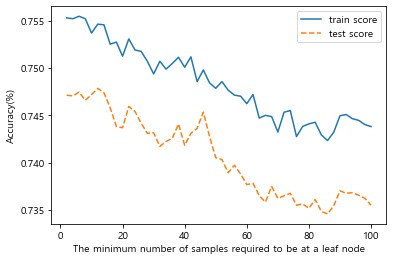

In [62]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_first2,y_train_first2,
                  X_val2, y_val2, 
               n_leaf_min, n_leaf_max, 40, 6, 36)



# 12 ,  22 , 46

# 12 : 67
# 22 : 72
# 46 : 44

In [63]:
params4 = {'n_estimators':[30,35,40,45,50],
         'max_depth' : [5,6,7],
         'min_samples_split' : [18 , 22 , 28, 36, 42] , 
 
          'min_samples_leaf' : [12 ,  22 , 46]}

rf = RFC(random_state=0)

grid_cv4 = GridSearchCV(rf , param_grid=params4 , cv=5 , n_jobs=-1 )

grid_cv4.fit(X_train2 , y_train2)


print(grid_cv4.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv4.best_params_)
print('최고 예측 정확도 : ' , grid_cv4.best_score_)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_samples_leaf': 12, 'min_samples_split': 42, 'n_estimators': 45}
최고 예측 정확도 :  0.7735411111250677


In [64]:
rf_best4 = grid_cv4.best_estimator_

pred = grid_cv4.best_estimator_.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv4.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv4.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv4.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv4.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv4.best_estimator_.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.7719386725842243
재현율: RandomForestClassifier 0.9978894604933386
정밀도: RandomForestClassifier 0.7711518858307849
F1: RandomForestClassifier 0.8699902248289345
roc_auc_score: RandomForestClassifier 0.5178045673662578


Accuracy: 0.693
Precision: 0.821
Recall: 0.766
F1-score: 0.792


<Figure size 2880x2880 with 0 Axes>

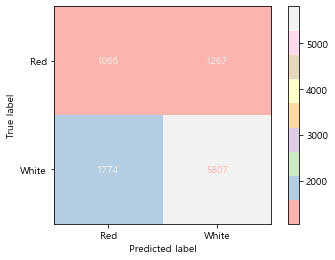

                    Feature  Importance
21                 구직기간(통합)       0.155
24                   일자리 횟수       0.109
9                        연령       0.090
23               재학중 일자리 경험       0.087
22                    건강한정도       0.073
20               석사/박사 재학여부       0.067
13                   부모님 소득       0.058
12                   어머니 학력       0.047
1                      국공사립       0.040
11                   아버지 학력       0.037
14                   부모님 자산       0.037
17                      GPA       0.036
8                        성별       0.031
4                      전공계열       0.016
25                     시간총합       0.016
5                 전공_소분류_코드       0.015
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.014
19                    휴학 횟수       0.014
3                       주야간       0.012
27                       토익       0.010
15                 대학 입학 구분       0.007
7                    학교소재지역       0.005
6                      학교유형       0.004
32                     체류시간       0.004


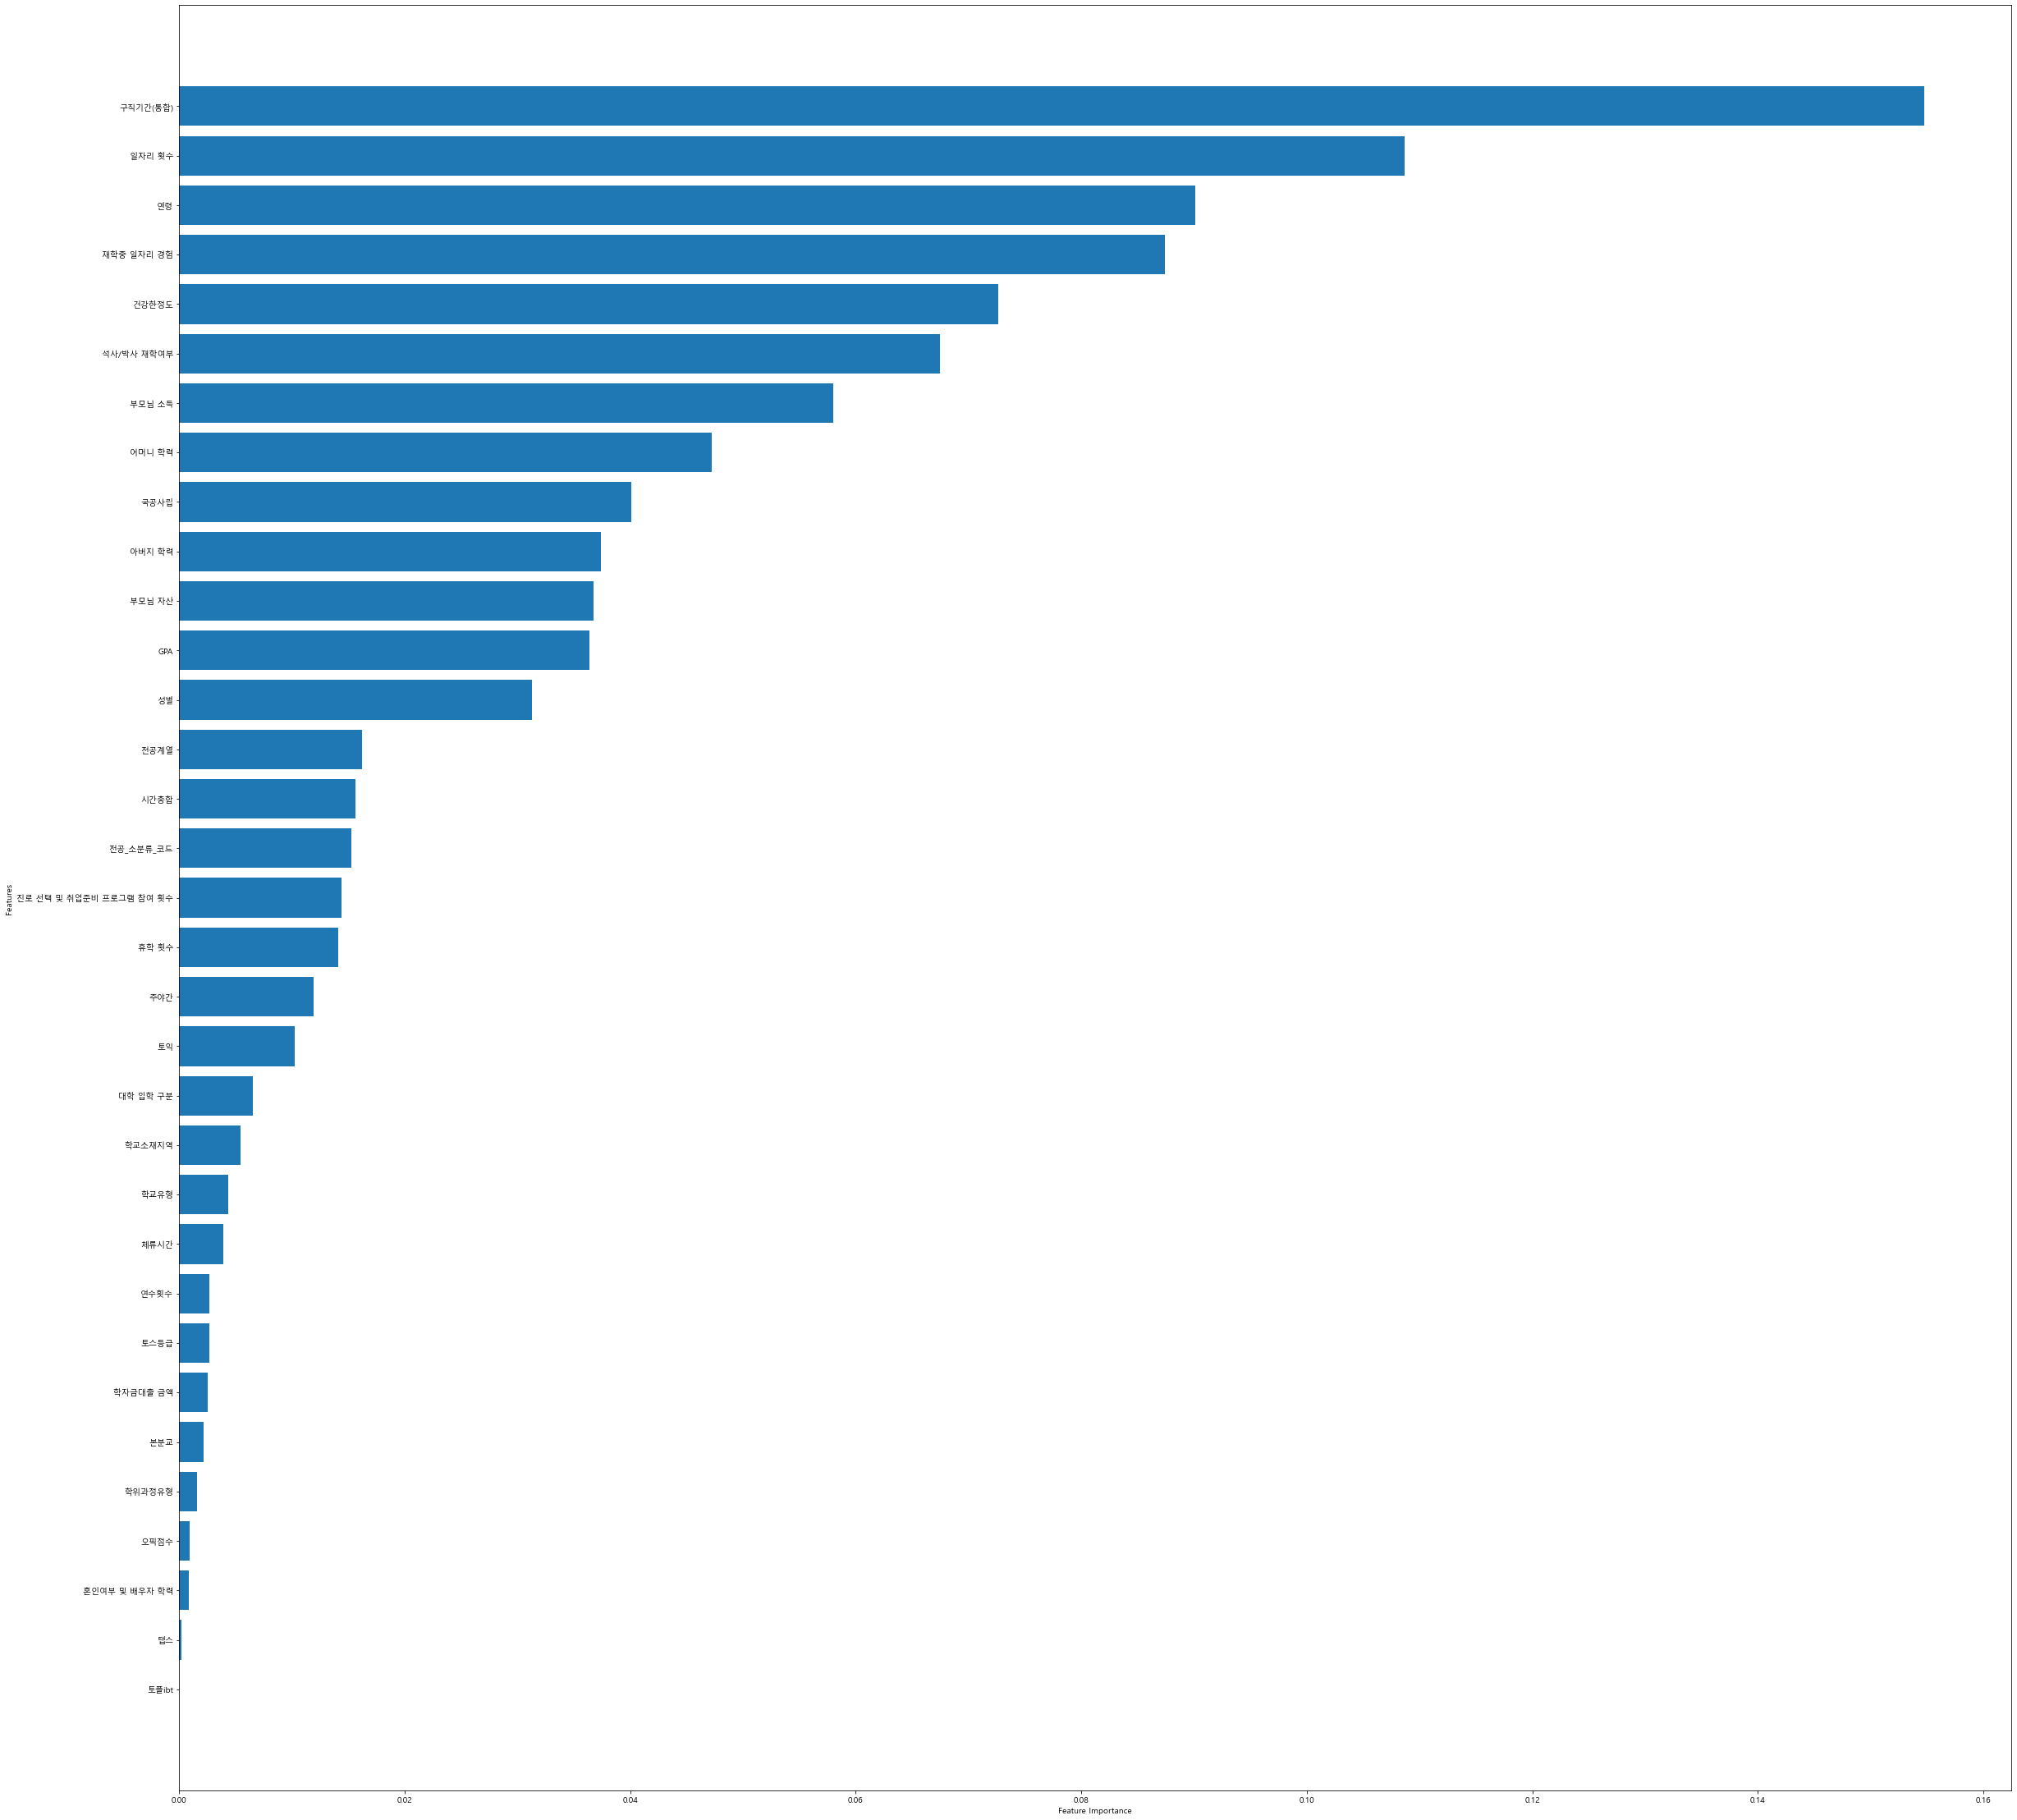

In [68]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_test2, y_test2,
            45, 7, 42, 12)

In [ ]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_val2, y_val2,
            40, 20, 2, 1)

Accuracy: 0.820
Precision: 0.796
Recall: 0.853
F1-score: 0.824


<Figure size 2160x2160 with 0 Axes>

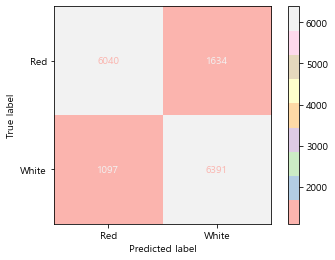

                    Feature  Importance
9                        연령       0.100
21                 구직기간(통합)       0.085
17                      GPA       0.071
24                   일자리 횟수       0.066
5                 전공_소분류_코드       0.064
22                    건강한정도       0.047
13                   부모님 소득       0.047
7                    학교소재지역       0.044
14                   부모님 자산       0.043
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.038
27                       토익       0.035
25                     시간총합       0.033
23               재학중 일자리 경험       0.033
11                   아버지 학력       0.032
12                   어머니 학력       0.032
4                      전공계열       0.031
1                      국공사립       0.030
20               석사/박사 재학여부       0.029
18                 학자금대출 금액       0.025
8                        성별       0.020
19                    휴학 횟수       0.018
32                     체류시간       0.013
28                     토스등급       0.011
6                      학교유형       0.008


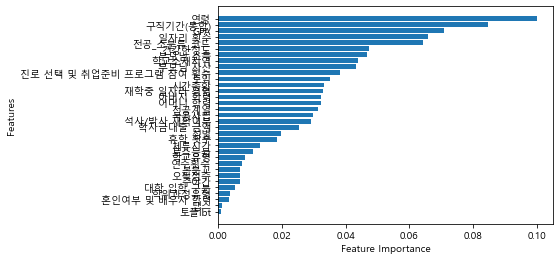

In [65]:
##########3 얘도 사용!!!!!!!!!!!

model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_val2, y_val2,
            40, 20, 2, 1)

Accuracy: 0.739
Precision: 0.813
Recall: 0.856
F1-score: 0.834


<Figure size 2160x2160 with 0 Axes>

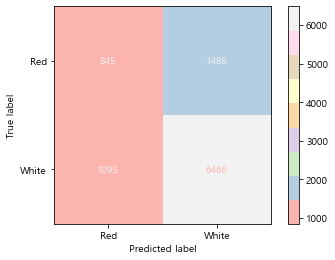

                    Feature  Importance
9                        연령       0.100
21                 구직기간(통합)       0.085
17                      GPA       0.071
24                   일자리 횟수       0.066
5                 전공_소분류_코드       0.064
22                    건강한정도       0.047
13                   부모님 소득       0.047
7                    학교소재지역       0.044
14                   부모님 자산       0.043
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.038
27                       토익       0.035
25                     시간총합       0.033
23               재학중 일자리 경험       0.033
11                   아버지 학력       0.032
12                   어머니 학력       0.032
4                      전공계열       0.031
1                      국공사립       0.030
20               석사/박사 재학여부       0.029
18                 학자금대출 금액       0.025
8                        성별       0.020
19                    휴학 횟수       0.018
32                     체류시간       0.013
28                     토스등급       0.011
6                      학교유형       0.008


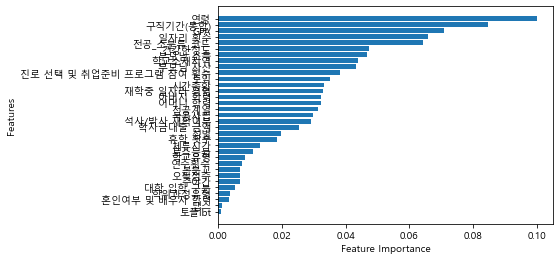

In [88]:
### 이 모델 사용!!!!!!!!!!!!!!!!!!!!!!!!!



model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_test2, y_test2,
            40, 20, 2, 1)

Accuracy: 0.782
Precision: 0.789
Recall: 0.975
F1-score: 0.872


<Figure size 2160x2160 with 0 Axes>

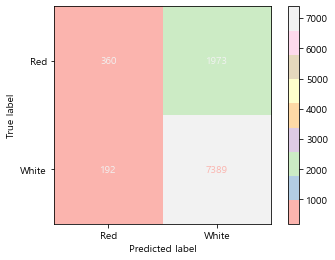

                    Feature  Importance
21                 구직기간(통합)       0.122
5                 전공_소분류_코드       0.085
17                      GPA       0.065
13                   부모님 소득       0.060
14                   부모님 자산       0.059
7                    학교소재지역       0.054
9                        연령       0.046
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.046
25                     시간총합       0.045
27                       토익       0.044
18                 학자금대출 금액       0.036
24                   일자리 횟수       0.035
11                   아버지 학력       0.034
12                   어머니 학력       0.032
20               석사/박사 재학여부       0.032
22                    건강한정도       0.031
4                      전공계열       0.031
19                    휴학 횟수       0.021
32                     체류시간       0.016
1                      국공사립       0.015
8                        성별       0.014
28                     토스등급       0.011
23               재학중 일자리 경험       0.011
29                     오픽점수       0.009


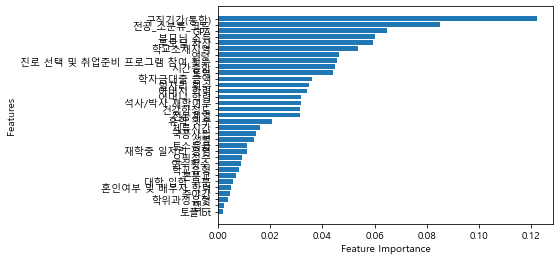

In [91]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train2,y_train2,
                  X_test2, y_test2,
            40, 20, 2, 1)

Accuracy: 0.783
Precision: 0.788
Recall: 0.978
F1-score: 0.873


<Figure size 2160x2160 with 0 Axes>

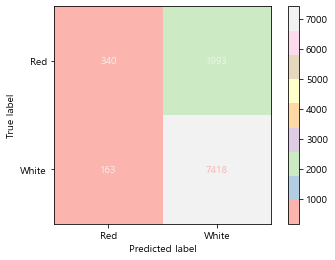

                    Feature  Importance
21                 구직기간(통합)       0.162
5                 전공_소분류_코드       0.085
13                   부모님 소득       0.062
14                   부모님 자산       0.061
17                      GPA       0.060
25                     시간총합       0.052
7                    학교소재지역       0.049
20               석사/박사 재학여부       0.044
27                       토익       0.044
9                        연령       0.041
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.040
18                 학자금대출 금액       0.034
4                      전공계열       0.031
24                   일자리 횟수       0.029
11                   아버지 학력       0.028
22                    건강한정도       0.028
12                   어머니 학력       0.027
19                    휴학 횟수       0.017
32                     체류시간       0.015
1                      국공사립       0.013
8                        성별       0.013
28                     토스등급       0.010
6                      학교유형       0.009
23               재학중 일자리 경험       0.009


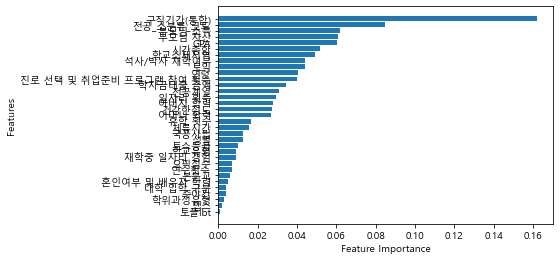

In [92]:
model_final(algorithm, algorithm_name, X2.columns,
             X_train2,y_train2,
                  X_test2, y_test2,
            40, 20, 12, 2)

Accuracy: 0.744
Precision: 0.816
Recall: 0.858
F1-score: 0.837


<Figure size 2880x2880 with 0 Axes>

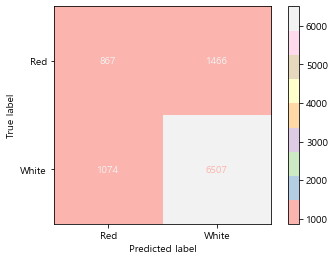

                    Feature  Importance
9                        연령       0.104
21                 구직기간(통합)       0.096
24                   일자리 횟수       0.085
17                      GPA       0.067
5                 전공_소분류_코드       0.056
22                    건강한정도       0.046
13                   부모님 소득       0.045
23               재학중 일자리 경험       0.043
14                   부모님 자산       0.041
7                    학교소재지역       0.036
20               석사/박사 재학여부       0.034
25                     시간총합       0.033
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.032
27                       토익       0.032
11                   아버지 학력       0.032
12                   어머니 학력       0.031
1                      국공사립       0.031
4                      전공계열       0.030
8                        성별       0.023
18                 학자금대출 금액       0.022
19                    휴학 횟수       0.018
32                     체류시간       0.011
28                     토스등급       0.010
6                      학교유형       0.008


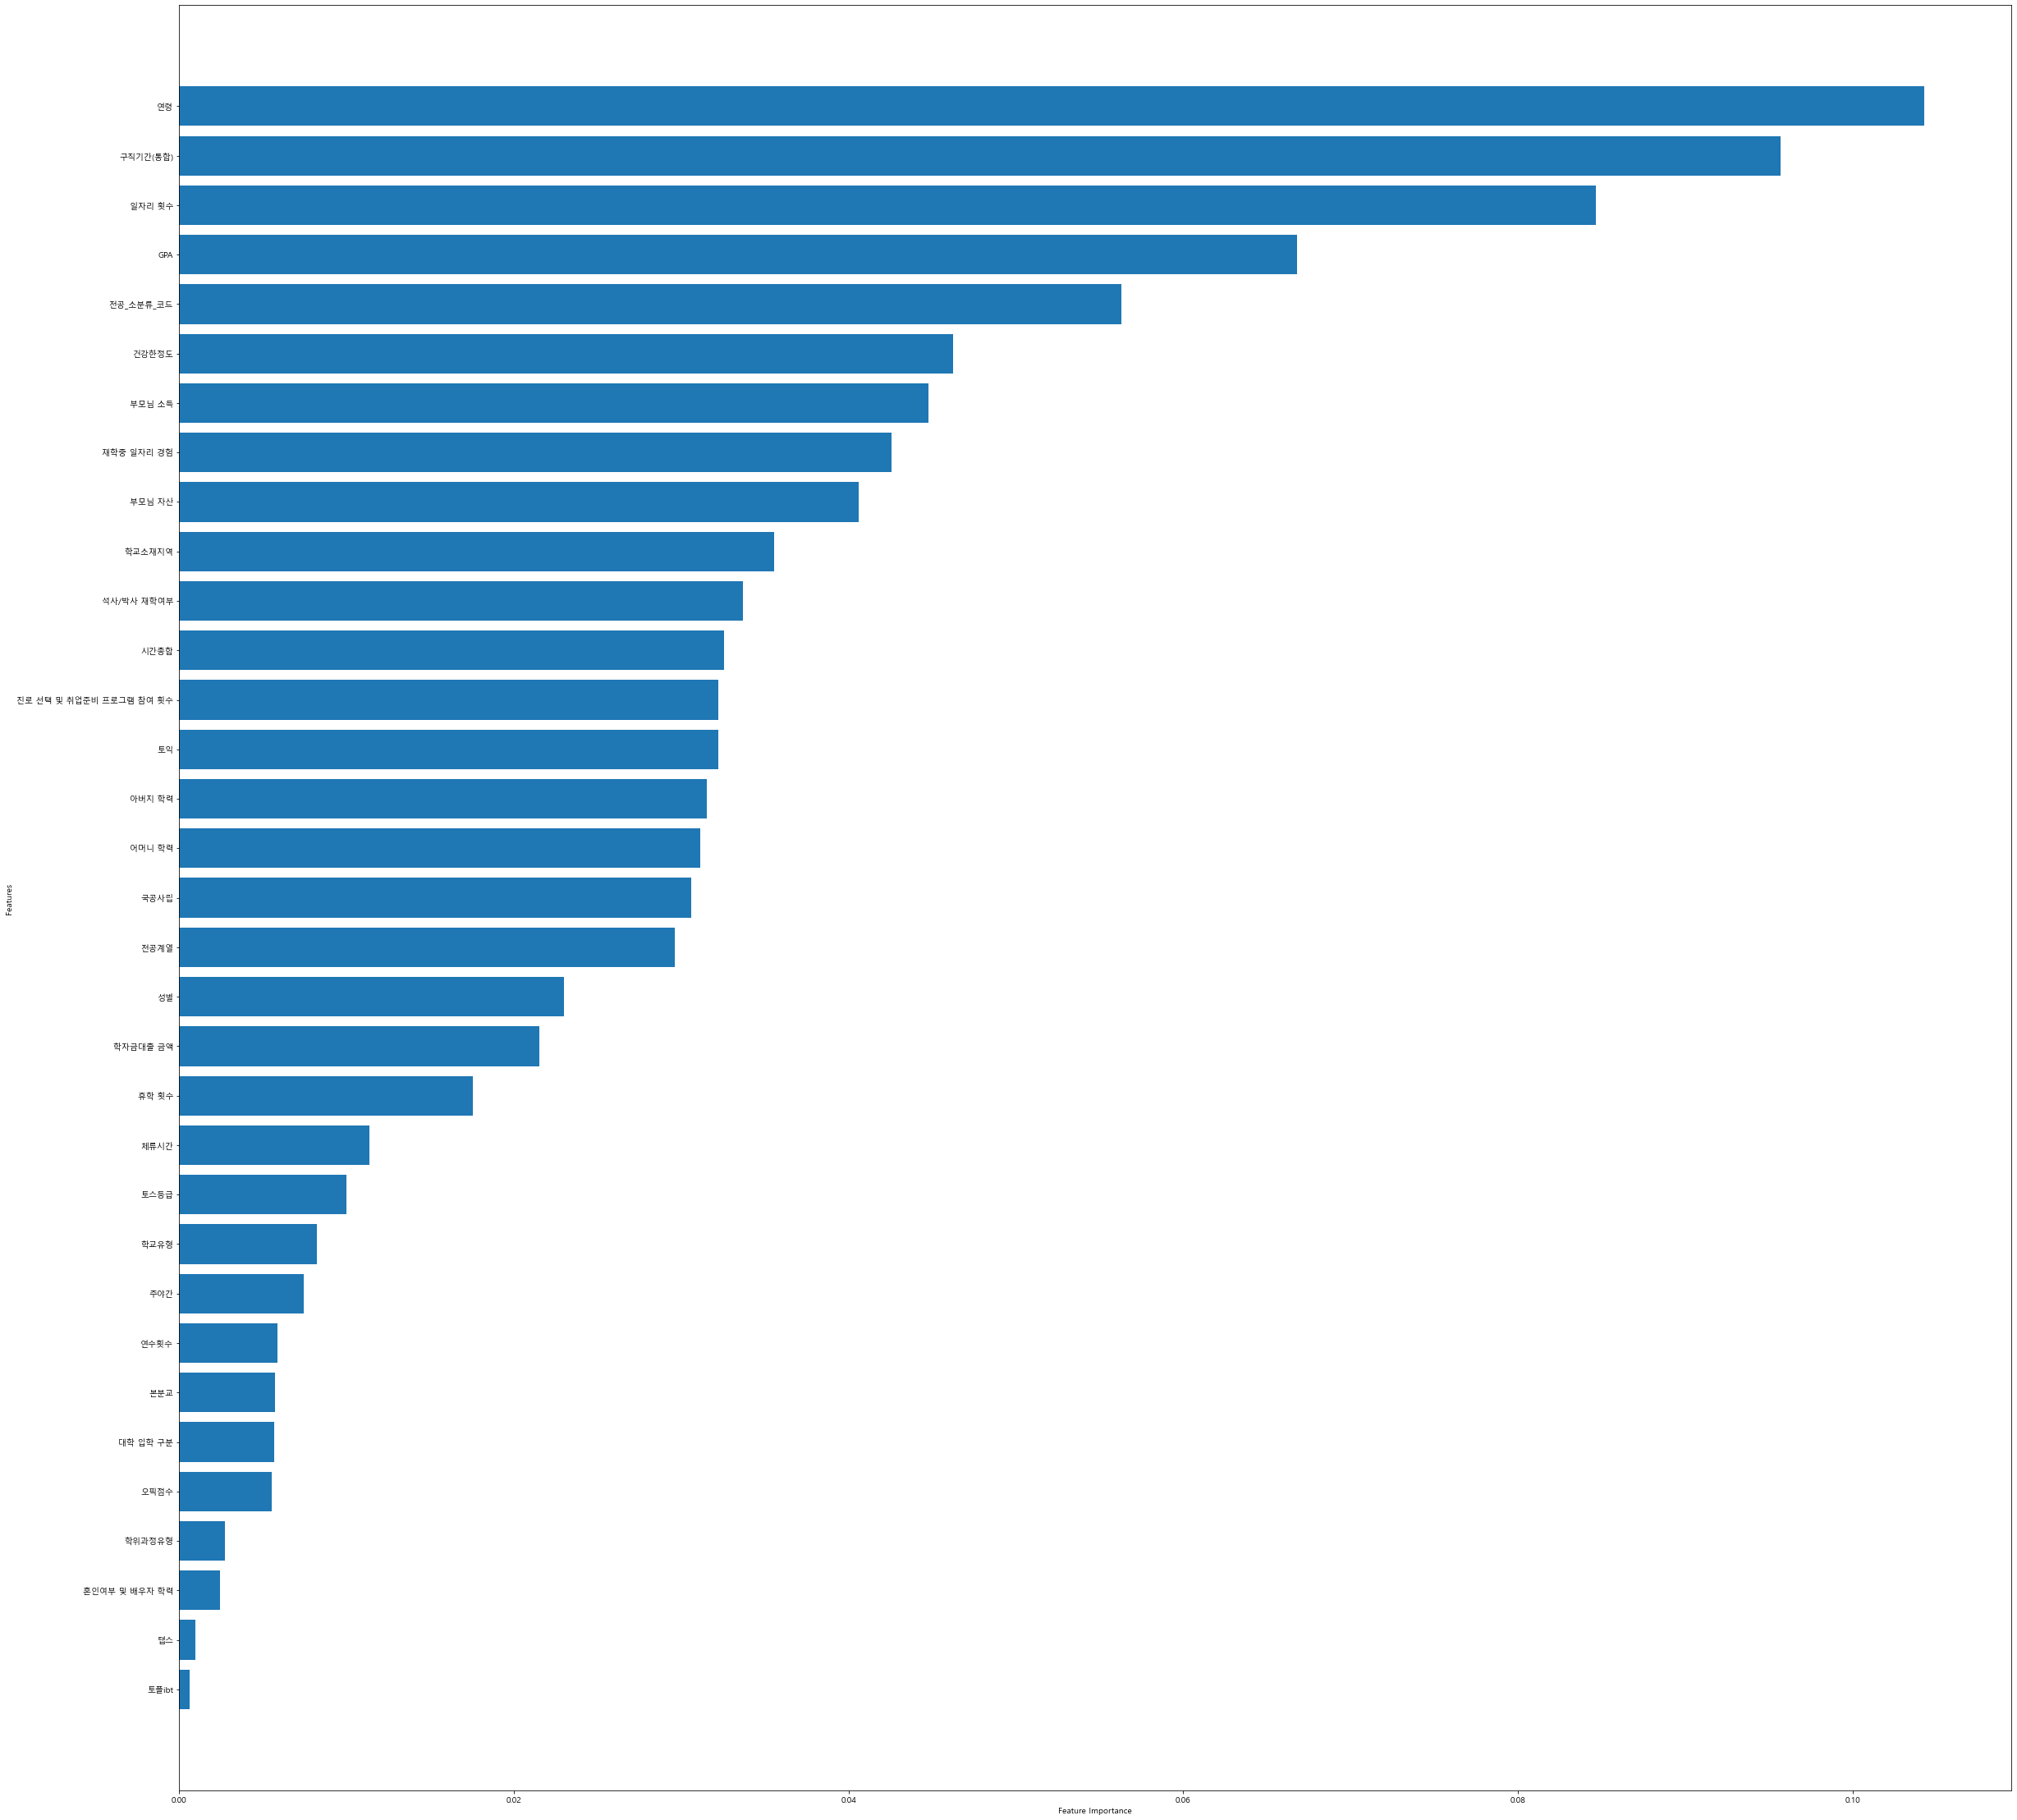

In [79]:
# 얘가 진짜 최종이다!!!!!!!!!!!!!!!!!!!!!!!!!!
start = time.time()
model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_test2, y_test2,
            40, 20, 12, 2)

print(time.time() - start)

In [81]:
def plot_importances(estimator, top=20):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train_first2.columns)

    ftr_top20 = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(16,10))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20, y = ftr_top20.index)
    plt.show()

In [82]:
rf_final = RFC(random_state=0 , n_estimators=40 , max_depth=20 , min_samples_split=12 , min_samples_leaf=2)
rf_final.fit(X_train_first2, y_train_first2)
pred = rf_final.predict(X_test2)

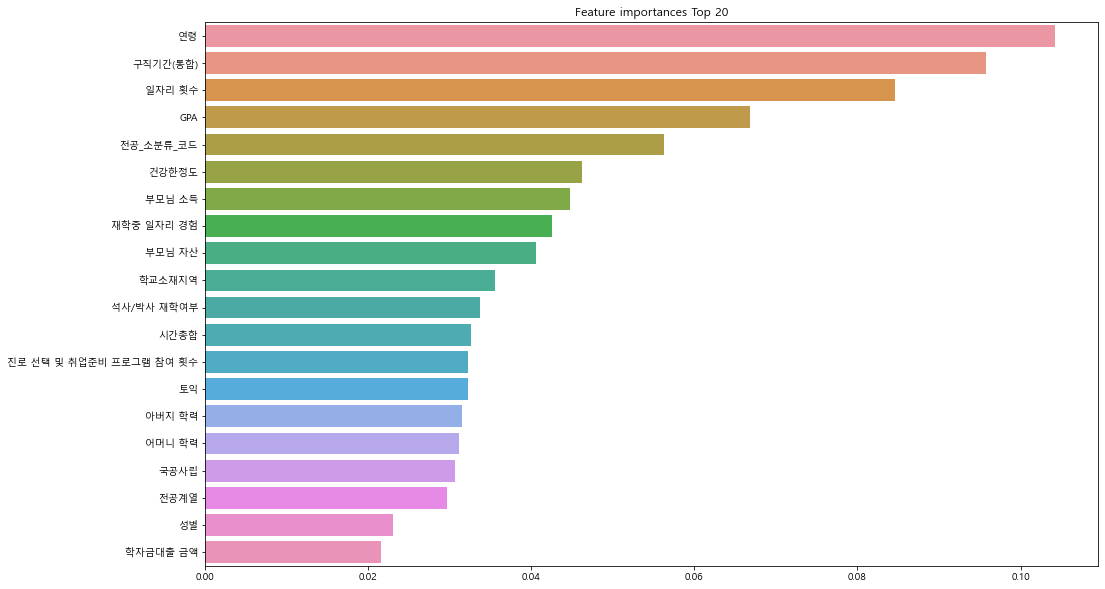

In [84]:
import seaborn as sns
plot_importances(rf_final)

In [92]:
def plot_importances5(estimator, top=5):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train_first2.columns)

    ftr_top5 = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(12,8))
    plt.title('Feature importances Top 5')
    sns.barplot(x=ftr_top5, y = ftr_top5.index)
    plt.show()

In [43]:
rf_clf = RFC(random_state=0 , n_estimators=40 , max_depth=20 , )

Accuracy: 0.648
Precision: 0.812
Recall: 0.702
F1-score: 0.753


<Figure size 2160x2160 with 0 Axes>

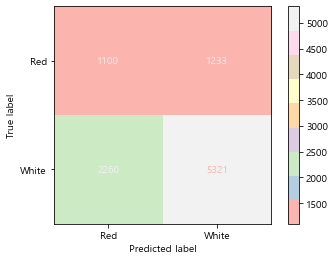

                    Feature  Importance
21                 구직기간(통합)       0.170
22                    건강한정도       0.160
1                      국공사립       0.089
23               재학중 일자리 경험       0.081
12                   어머니 학력       0.079
9                        연령       0.052
13                   부모님 소득       0.051
17                      GPA       0.041
20               석사/박사 재학여부       0.037
14                   부모님 자산       0.037
24                   일자리 횟수       0.029
8                        성별       0.029
5                 전공_소분류_코드       0.019
16  진로 선택 및 취업준비 프로그램 참여 횟수       0.017
25                     시간총합       0.017
19                    휴학 횟수       0.016
32                     체류시간       0.013
11                   아버지 학력       0.012
15                 대학 입학 구분       0.011
4                      전공계열       0.008
7                    학교소재지역       0.007
27                       토익       0.007
6                      학교유형       0.007
26                     연수횟수       0.006


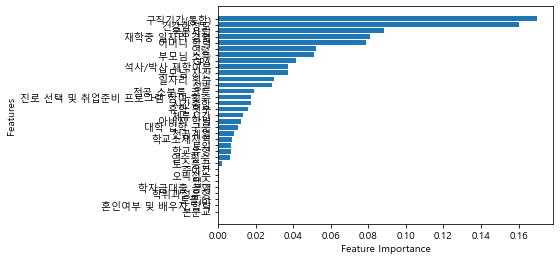

In [106]:
# RandomForest 기본값

model_final(algorithm, algorithm_name, X2.columns,
             X_train_first2,y_train_first2,
                  X_test2, y_test2,
            10, 5, 2, 1)

In [97]:
xgb = XGBClassifier()

xgb.fit(X_train_first2 , y_train_first2)

pred = xgb.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)

[01:18:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: RandomForestClassifier 0.80411539237442
재현율: RandomForestClassifier 0.9217781295343622
정밀도: RandomForestClassifier 0.8381911958738155
F1: RandomForestClassifier 0.8779997487121498
roc_auc_score: RandomForestClassifier 0.6717763343771254


In [98]:
xgb = XGBClassifier()

xgb.fit(X_train2 , y_train2)

pred = xgb.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)

[01:18:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: RandomForestClassifier 0.8147064756909421
재현율: RandomForestClassifier 0.9439387943543068
정밀도: RandomForestClassifier 0.8352007469654529
F1: RandomForestClassifier 0.886246826428881
roc_auc_score: RandomForestClassifier 0.6693547379401196


In [174]:
# 중요도 높은 20개 피처를 seaborn barplot을 이용하여 그리기
def plot_importances(estimator, top=20):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X2.columns)

    ftr_top20 = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(16,10))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20, y = ftr_top20.index)
    plt.show()

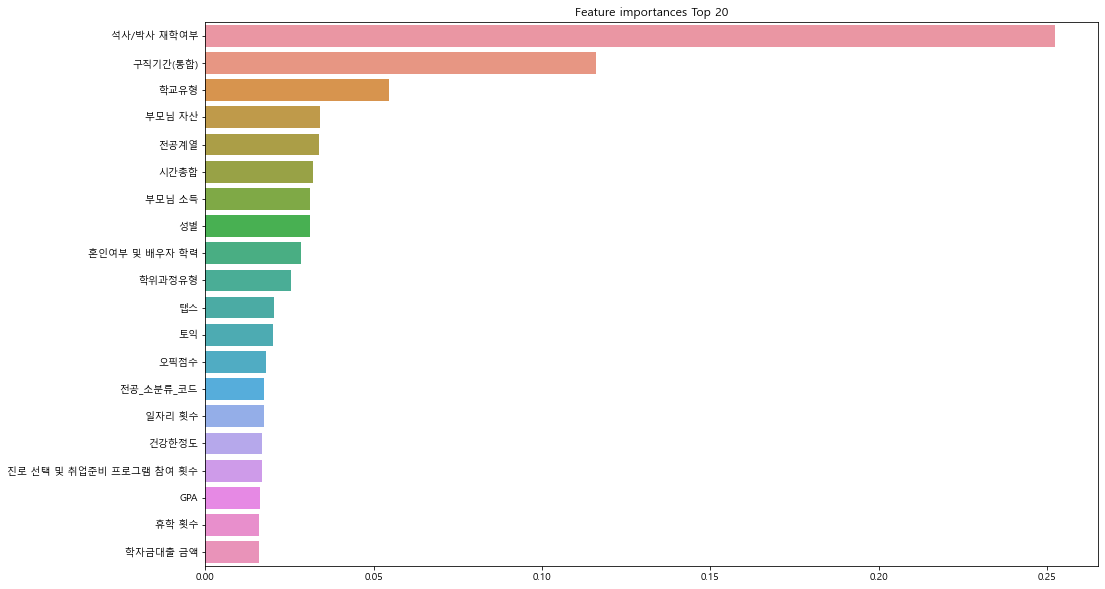

array([0.01474931, 0.0137994 , 0.02534773, 0.01540235, 0.03382283,
       0.01759552, 0.05455611, 0.0144561 , 0.03099551, 0.0157084 ,
       0.02841058, 0.01351104, 0.01445925, 0.03123079, 0.03411661,
       0.01435396, 0.01679824, 0.01615817, 0.01587414, 0.01597492,
       0.25249594, 0.11619475, 0.01696608, 0.01518394, 0.0173308 ,
       0.03194051, 0.01448875, 0.02027658, 0.01551298, 0.01818326,
       0.00888528, 0.0205084 , 0.01471175], dtype=float32)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_importances(xgb)

xgb.feature_importances_

In [93]:
plot_importances(xgb1)

ValueError: Length of passed values is 34, index implies 33.

## 16, 17 , 18 년도 비교

In [141]:
data = pd.read_csv('GP_통합(3years)_ver4_취업예측용_구직기간.csv')
data.head()
data.columns

Index(['연도', '본분교', '국공사립', '학위과정유형', '주야간', '전공계열', '전공_소분류_코드', '전공_세분류_코드',
       '학교유형', '학교소재지역', '성별', '연령', '혼인여부 및 배우자 학력', '아버지 학력', '어머니 학력',
       '부모님 소득', '부모님 자산', '가정의 경제적 지원', '대학 입학 구분', '진로 선택 및 취업준비 프로그램 참여 횟수',
       'GPA', '학자금대출 금액', '휴학 횟수', '석사/박사 재학여부', '목표 직업', '목표 직업 유형', '희망연봉',
       '근로소득', '근로시간', '적성 및 흥미', '전공 관련성', '업무 난이도', '업무량', '개인 발전 가능성',
       '직업 미래 전망', '고용 안정성', '근무환경', '복리후생', '회사 규모', '출퇴근 거리', '일자리의 사회적 평판',
       '업무의 사회적 평판', '일자리 지원 횟수', '면접 횟수', '합격 제의 횟수', '거절 이유', '구직 과정 어려운 점',
       '인턴경험여부(현직장)', '구직기간(통합)', '구직경로', '구직방법', '취업_중요요소_1순위', '취업_중요요소_2순위',
       '건강한정도', '운동시간(주)', '수면시간(일)', '흡연여부', '음주빈도', '재학중 일자리 경험', '일자리 횟수',
       '고용형태', '교육훈련횟수', '시간총합', '연수횟수', '토익', '토스등급', '오픽점수', '토플ibt', '탭스',
       '체류시간', '취업여부', '기업 구분', '종사상 지위'],
      dtype='object')

In [142]:
data = data.drop(columns=['기업 구분' , '종사상 지위' , '가정의 경제적 지원'])

In [143]:
data['연령'] = remove_outlier(df['연령'])
data.isnull().sum()

연도                            0
본분교                           0
국공사립                          0
학위과정유형                        0
주야간                           0
전공계열                          0
전공_소분류_코드                     0
전공_세분류_코드                     0
학교유형                          0
학교소재지역                        0
성별                            0
연령                         2122
혼인여부 및 배우자 학력                 0
아버지 학력                        0
어머니 학력                        0
부모님 소득                        0
부모님 자산                        0
대학 입학 구분                      0
진로 선택 및 취업준비 프로그램 참여 횟수       0
GPA                           0
학자금대출 금액                      0
휴학 횟수                         0
석사/박사 재학여부                    0
목표 직업                         0
목표 직업 유형                      0
희망연봉                          0
근로소득                          0
근로시간                          0
적성 및 흥미                       0
전공 관련성                        0
업무 난이도                        0
업무량     

In [144]:
data.dropna(inplace=True)

In [145]:
data.isnull().sum()

연도                         0
본분교                        0
국공사립                       0
학위과정유형                     0
주야간                        0
전공계열                       0
전공_소분류_코드                  0
전공_세분류_코드                  0
학교유형                       0
학교소재지역                     0
성별                         0
연령                         0
혼인여부 및 배우자 학력              0
아버지 학력                     0
어머니 학력                     0
부모님 소득                     0
부모님 자산                     0
대학 입학 구분                   0
진로 선택 및 취업준비 프로그램 참여 횟수    0
GPA                        0
학자금대출 금액                   0
휴학 횟수                      0
석사/박사 재학여부                 0
목표 직업                      0
목표 직업 유형                   0
희망연봉                       0
근로소득                       0
근로시간                       0
적성 및 흥미                    0
전공 관련성                     0
업무 난이도                     0
업무량                        0
개인 발전 가능성                  0
직업 미래 전망                   0
고용 안정성        

In [154]:
data2016 = data[data['연도']==2016]
data2016.shape
data2016.reset_index(inplace=True , drop=True)
data2016.drop(columns=['연도'] , inplace=True)
data2016

,본분교,국공사립,학위과정유형,주야간,전공계열,전공_소분류_코드,전공_세분류_코드,학교유형,학교소재지역,성별,...,교육훈련횟수,시간총합,연수횟수,토익,토스등급,오픽점수,토플ibt,탭스,체류시간,취업여부
0,1,3,3,1,1,0,0,1,8,1,...,1,100,1,0,0,0,0,0,1,0
1,1,3,3,1,1,0,0,1,5,2,...,0,0,0,0,0,0,0,0,0,1
2,1,3,3,1,1,0,0,1,8,2,...,0,0,0,0,0,0,0,0,0,0
3,1,3,3,1,1,0,0,1,8,1,...,0,0,0,0,0,0,0,0,0,0
4,1,3,3,1,1,0,1,1,2,1,...,1,3,1,0,0,0,0,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16459,1,3,3,1,7,205,5024,2,1,2,...,0,0,0,920,0,0,0,0,0,1
16460,1,3,3,1,7,205,5025,2,14,2,...,0,0,0,0,0,0,0,0,0,1
16461,1,3,3,1,7,205,5028,2,14,2,...,0,0,1,0,0,0,0,0,10,1
16462,1,3,3,1,7,205,5030,2,11,1,...,0,0,0,0,0,0,0,0,0,1


In [155]:
data2017 = data[data['연도']==2017]
data2017.shape
data2017.reset_index(inplace=True , drop=True)
data2017.drop(columns=['연도'] , inplace=True)
data2017

,본분교,국공사립,학위과정유형,주야간,전공계열,전공_소분류_코드,전공_세분류_코드,학교유형,학교소재지역,성별,...,교육훈련횟수,시간총합,연수횟수,토익,토스등급,오픽점수,토플ibt,탭스,체류시간,취업여부
0,1,3,3,1,1,0,4,1,1,2,...,1,120,0,0,0,0,0,0,0,1
1,1,3,3,1,1,0,2,1,9,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,3,1,1,0,2,1,9,2,...,0,0,0,0,0,0,0,0,0,0
3,1,3,3,1,1,0,2,1,8,2,...,0,0,0,0,0,0,0,0,0,1
4,1,3,3,1,1,0,1,1,8,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16422,1,2,3,1,3,19,504,1,15,1,...,0,0,0,0,0,0,0,0,0,1
16423,1,3,3,1,3,19,500,1,14,1,...,0,0,0,0,0,0,0,0,0,0
16424,1,3,3,1,3,19,500,1,3,1,...,0,0,0,0,0,0,0,0,0,1
16425,1,3,3,1,3,19,500,1,1,1,...,0,0,1,0,0,0,0,0,1,1


In [156]:
data2018 = data[data['연도']==2018]
data2018.shape
data2018.reset_index(inplace=True , drop=True)
data2018.drop(columns=['연도'] , inplace=True)
data2018

,본분교,국공사립,학위과정유형,주야간,전공계열,전공_소분류_코드,전공_세분류_코드,학교유형,학교소재지역,성별,...,교육훈련횟수,시간총합,연수횟수,토익,토스등급,오픽점수,토플ibt,탭스,체류시간,취업여부
0,1,3,3,2,1,0,7,1,1,2,...,0,0,0,0,0,0,0,0,0,1
1,1,3,3,1,1,0,4,1,1,1,...,1,240,0,0,0,0,0,0,0,0
2,1,3,3,1,1,0,4,1,1,1,...,0,0,0,800,0,0,0,0,0,1
3,1,3,3,1,1,0,2,1,8,2,...,0,0,1,0,0,0,0,0,12,1
4,1,3,3,1,1,0,2,1,8,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16672,1,3,3,1,7,203,4996,2,1,2,...,0,0,1,0,0,0,0,0,6,1
16673,1,3,3,1,7,205,5013,2,1,1,...,0,0,0,0,0,0,0,0,0,0
16674,1,3,3,1,7,205,5012,2,1,2,...,0,0,0,0,0,0,0,0,0,1
16675,1,3,3,1,7,205,5011,2,1,1,...,0,0,0,0,0,0,0,0,0,1


In [157]:
y2016 = data2016['취업여부']
X2016 = data2016.drop(columns=['취업여부'])

y2017 = data2017['취업여부']
X2017 = data2017.drop(columns=['취업여부'])

y2018 = data2018['취업여부']
X2018 = data2018.drop(columns=['취업여부'])

In [163]:
X_train2016 , X_test2016 , y_train2016, y_test2016 = train_test_split(X2016, y2016 , test_size=0.2 , random_state=0 , stratify=y2016)

smote = SMOTE(random_state=0)
X_train_over2016 , y_train_over2016 = smote.fit_resample(X_train2016, y_train2016)

X_train_first2016 , X_val2016 , y_train_first2016 , y_val2016 = train_test_split(X_train_over2016 , y_train_over2016 , random_state=0 , test_size=0.25) 

In [165]:
X_train2017 , X_test2017 , y_train2017, y_test2017 = train_test_split(X2017, y2017 , test_size=0.2 , random_state=0 , stratify=y2017)

smote = SMOTE(random_state=0)
X_train_over2017 , y_train_over2017 = smote.fit_resample(X_train2017, y_train2017)

X_train_first2017 , X_val2017 , y_train_first2017 , y_val2017 = train_test_split(X_train_over2017 , y_train_over2017 , random_state=0 , test_size=0.25) 

In [166]:
X_train2018 , X_test2018 , y_train2018, y_test2018 = train_test_split(X2018, y2018 , test_size=0.2 , random_state=0 , stratify=y2018)

smote = SMOTE(random_state=0)
X_train_over2018 , y_train_over2018 = smote.fit_resample(X_train2018, y_train2018)

X_train_first2018 , X_val2018 , y_train_first2018 , y_val2018 = train_test_split(X_train_over2018 , y_train_over2018 , random_state=0 , test_size=0.25) 

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


<Figure size 2160x2160 with 0 Axes>

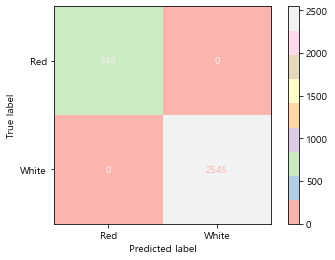

                    Feature  Importance
48                     구직방법       0.242
47                     구직경로       0.212
50              취업_중요요소_2순위       0.168
49              취업_중요요소_1순위       0.150
45              인턴경험여부(현직장)       0.075
41                    면접 횟수       0.060
43                    거절 이유       0.043
46                 구직기간(통합)       0.020
42                 합격 제의 횟수       0.013
40                일자리 지원 횟수       0.004
55                     음주빈도       0.003
21               석사/박사 재학여부       0.003
4                      전공계열       0.002
23                 목표 직업 유형       0.001
7                      학교유형       0.001
53                  수면시간(일)       0.001
27                  적성 및 흥미       0.001
5                 전공_소분류_코드       0.001
59                   교육훈련횟수       0.000
24                     희망연봉       0.000
30                      업무량       0.000
20                    휴학 횟수       0.000
60                     시간총합       0.000
54                     흡연여부       0.000


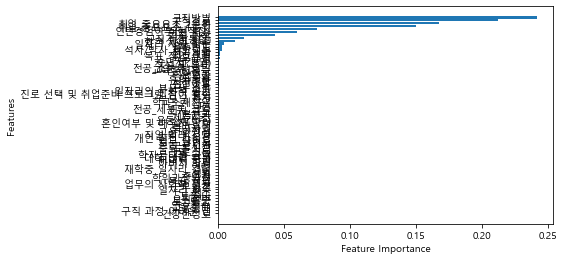

In [170]:
model_final(algorithm, algorithm_name, X2016.columns,
             X_train2016,y_train2016,
                  X_test2016, y_test2016,
            10, 5, 2, 1)

    n_estimators  TrainScore  TestScore
0              5         1.0        1.0
1             10         1.0        1.0
2             15         1.0        1.0
3             20         1.0        1.0
4             25         1.0        1.0
5             30         1.0        1.0
6             35         1.0        1.0
7             40         1.0        1.0
8             45         1.0        1.0
9             50         1.0        1.0
10            55         1.0        1.0
11            60         1.0        1.0
12            65         1.0        1.0
13            70         1.0        1.0
14            75         1.0        1.0
15            80         1.0        1.0
16            85         1.0        1.0
17            90         1.0        1.0
18            95         1.0        1.0


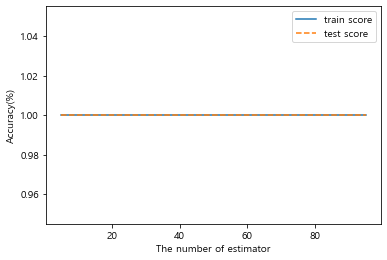

In [171]:
n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                  X_train_first2016,y_train_first2016,
                  X_val2016, y_val2016,
                 n_estimator_min, n_estimator_max)

In [89]:
# 반드시 튜닝해야할 파라미터는  min_child_weight / max_depth / gamma

# xgb.XGBClassifier(
    
#     # General Parameter
#     booster='gbtree' # 트리,회귀(gblinear) 트리가 항상 
#                      # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    
#     silent=True  # running message출력안한다.
#                  # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    
#     min_child_weight=10   # 값이 높아지면 under-fitting 되는 
#                           # 경우가 있다. CV를 통해 튜닝되어야 한다.
    
#     max_depth=8     # 트리의 최대 깊이를 정의함. 
#                     # 루트에서 가장 긴 노드의 거리.
#                     # 8이면 중요변수에서 결론까지 변수가 9개거친다.
#                     # Typical Value는 3-10. 
    
#     gamma =0    # 노드가 split 되기 위한 loss function의 값이
#                 # 감소하는 최소값을 정의한다. gamma 값이 높아질 수록 
#                 # 알고리즘은 보수적으로 변하고, loss function의 정의
#                 #에 따라 적정값이 달라지기때문에 반드시 튜닝.


params = {'min_child_weight':[2, 8, 9 , 10, 11, 12],
         'max_depth' : [ 6 ,7 , 8, 9 , 10 , 20],
          'n_estimators':[40]
         }

xgb = XGBClassifier(random_state = 0)

grid_cv = GridSearchCV(xgb , param_grid=params , cv=5 , n_jobs=-1)

grid_cv.fit(X_train2 , y_train2)


print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv.best_params_)
print('최고 예측 정확도 : ' , grid_cv.best_score_)

[01:29:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_child_weight': 11, 'n_estimators': 40}
최고 예측 정확도 :  0.8159580829802062


In [90]:
xgb_best = grid_cv.best_estimator_

pred = grid_cv.best_estimator_.predict(X_test2)

acc = accuracy_score(y_test2, pred)
recall = recall_score(y_test2, pred)
precision = precision_score(y_test2, pred)
f1 = f1_score(y_test2 , pred)
roc = roc_auc_score(y_test2, pred)

print('정확도:',grid_cv.best_estimator_.__class__.__name__ ,  acc)
print('재현율:',grid_cv.best_estimator_.__class__.__name__ ,  recall)
print('정밀도:',grid_cv.best_estimator_.__class__.__name__ ,  precision)
print('F1:',grid_cv.best_estimator_.__class__.__name__ ,  f1)
print('roc_auc_score:',grid_cv.best_estimator_.__class__.__name__ ,  roc)


정확도: XGBClassifier 0.8136978010893686
재현율: XGBClassifier 0.9497427779976256
정밀도: XGBClassifier 0.830833141010847
F1: XGBClassifier 0.8863174739951991
roc_auc_score: XGBClassifier 0.6606836478929405


[01:34:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


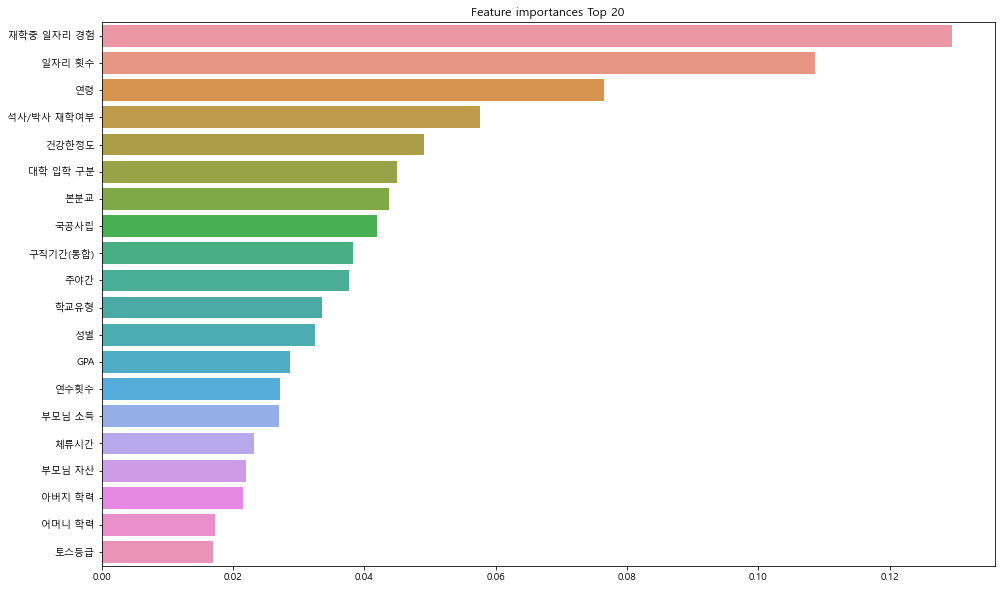

In [91]:
xgb_best.fit(X_train_first2 , y_train_first2)


plot_importances(xgb_best)

In [87]:
xgb_same = XGBClassifier(random_state=0 , n_estimators=40 , max_depth=20 , min_child_weight=2)



xgb_same.fit(X_train_first2, y_train_first2)
pred = xgb_same.predict(X_test2)

[01:26:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


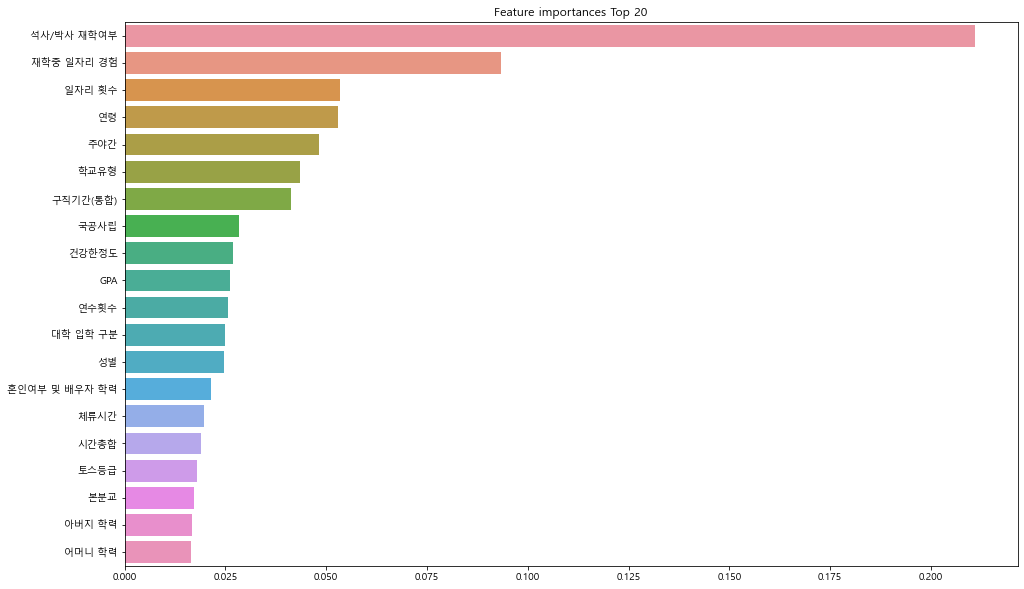

In [94]:
plot_importances(xgb_same)

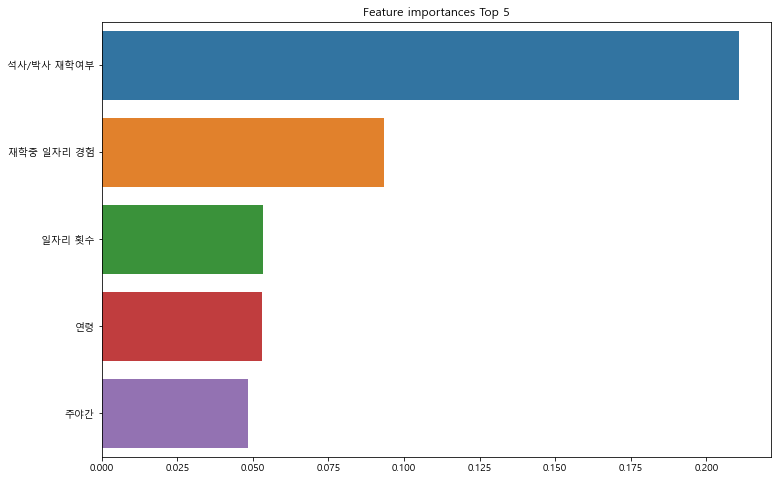

In [96]:
plot_importances5(xgb_same)

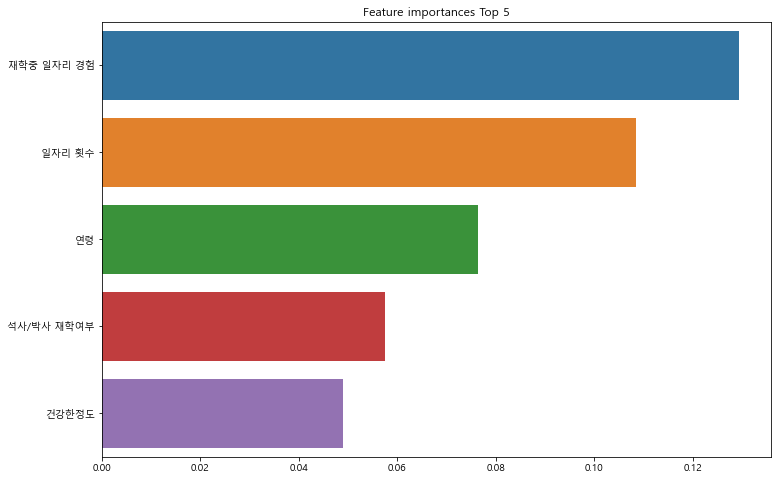

In [98]:
plot_importances5(xgb_best)

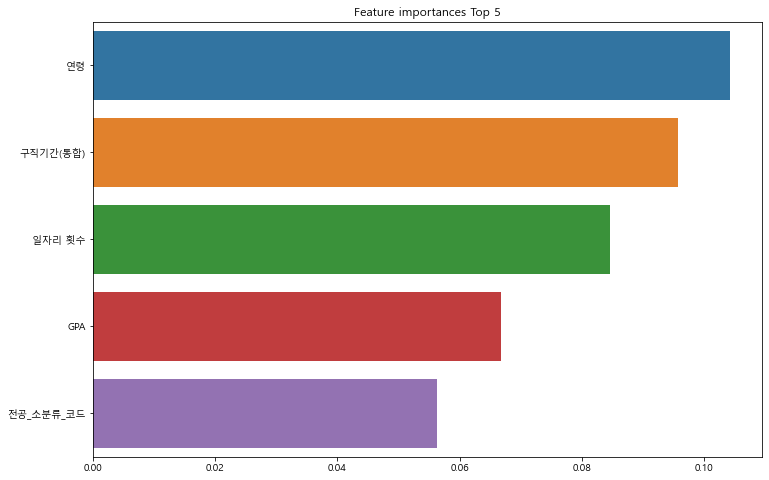

In [100]:
plot_importances5(rf_final)

In [102]:
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=11, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
rf_final.estimators_[1]

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=12, random_state=398764591)

In [137]:
from sklearn.tree import export_graphviz
import graphviz

In [128]:
a = X_train2.columns.to_list()

In [129]:
type(a)

list

In [151]:
b = df['취업여부']

In [153]:
y_train_first2.value_counts()

1    22835
0    22649
Name: 취업여부, dtype: int64

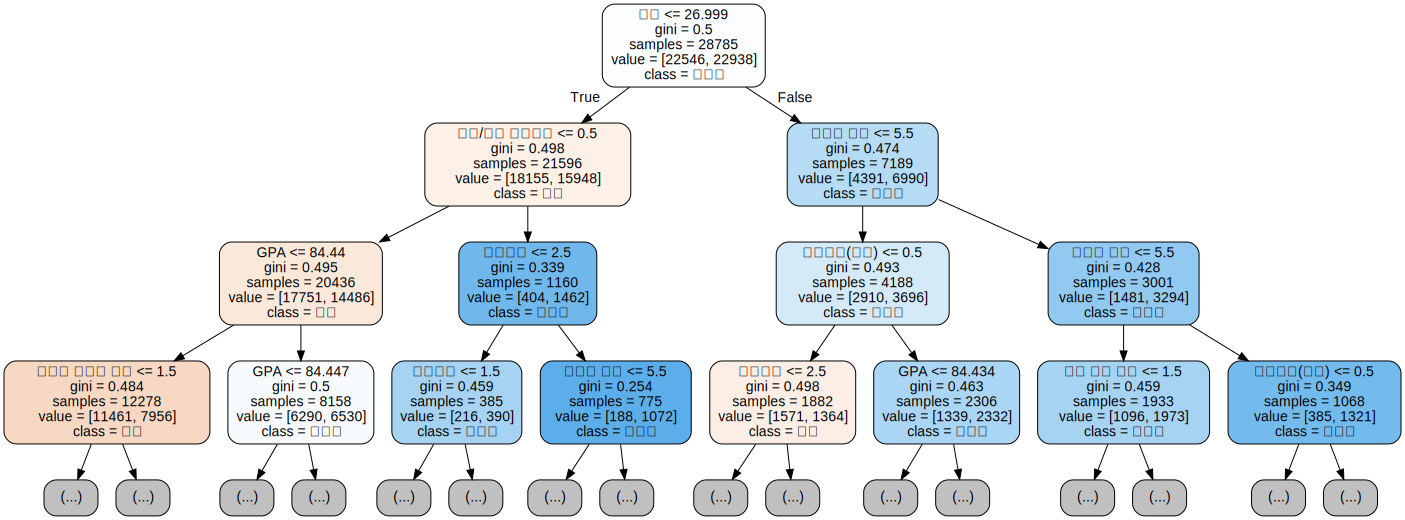

In [164]:
dot_data = export_graphviz(rf_final.estimators_[7],  
#                            out_file='tree.dot' , 
                feature_names = a,
                class_names = ['취업' , '미취업'],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
                
               )


graph = graphviz.Source(dot_data)              
graph

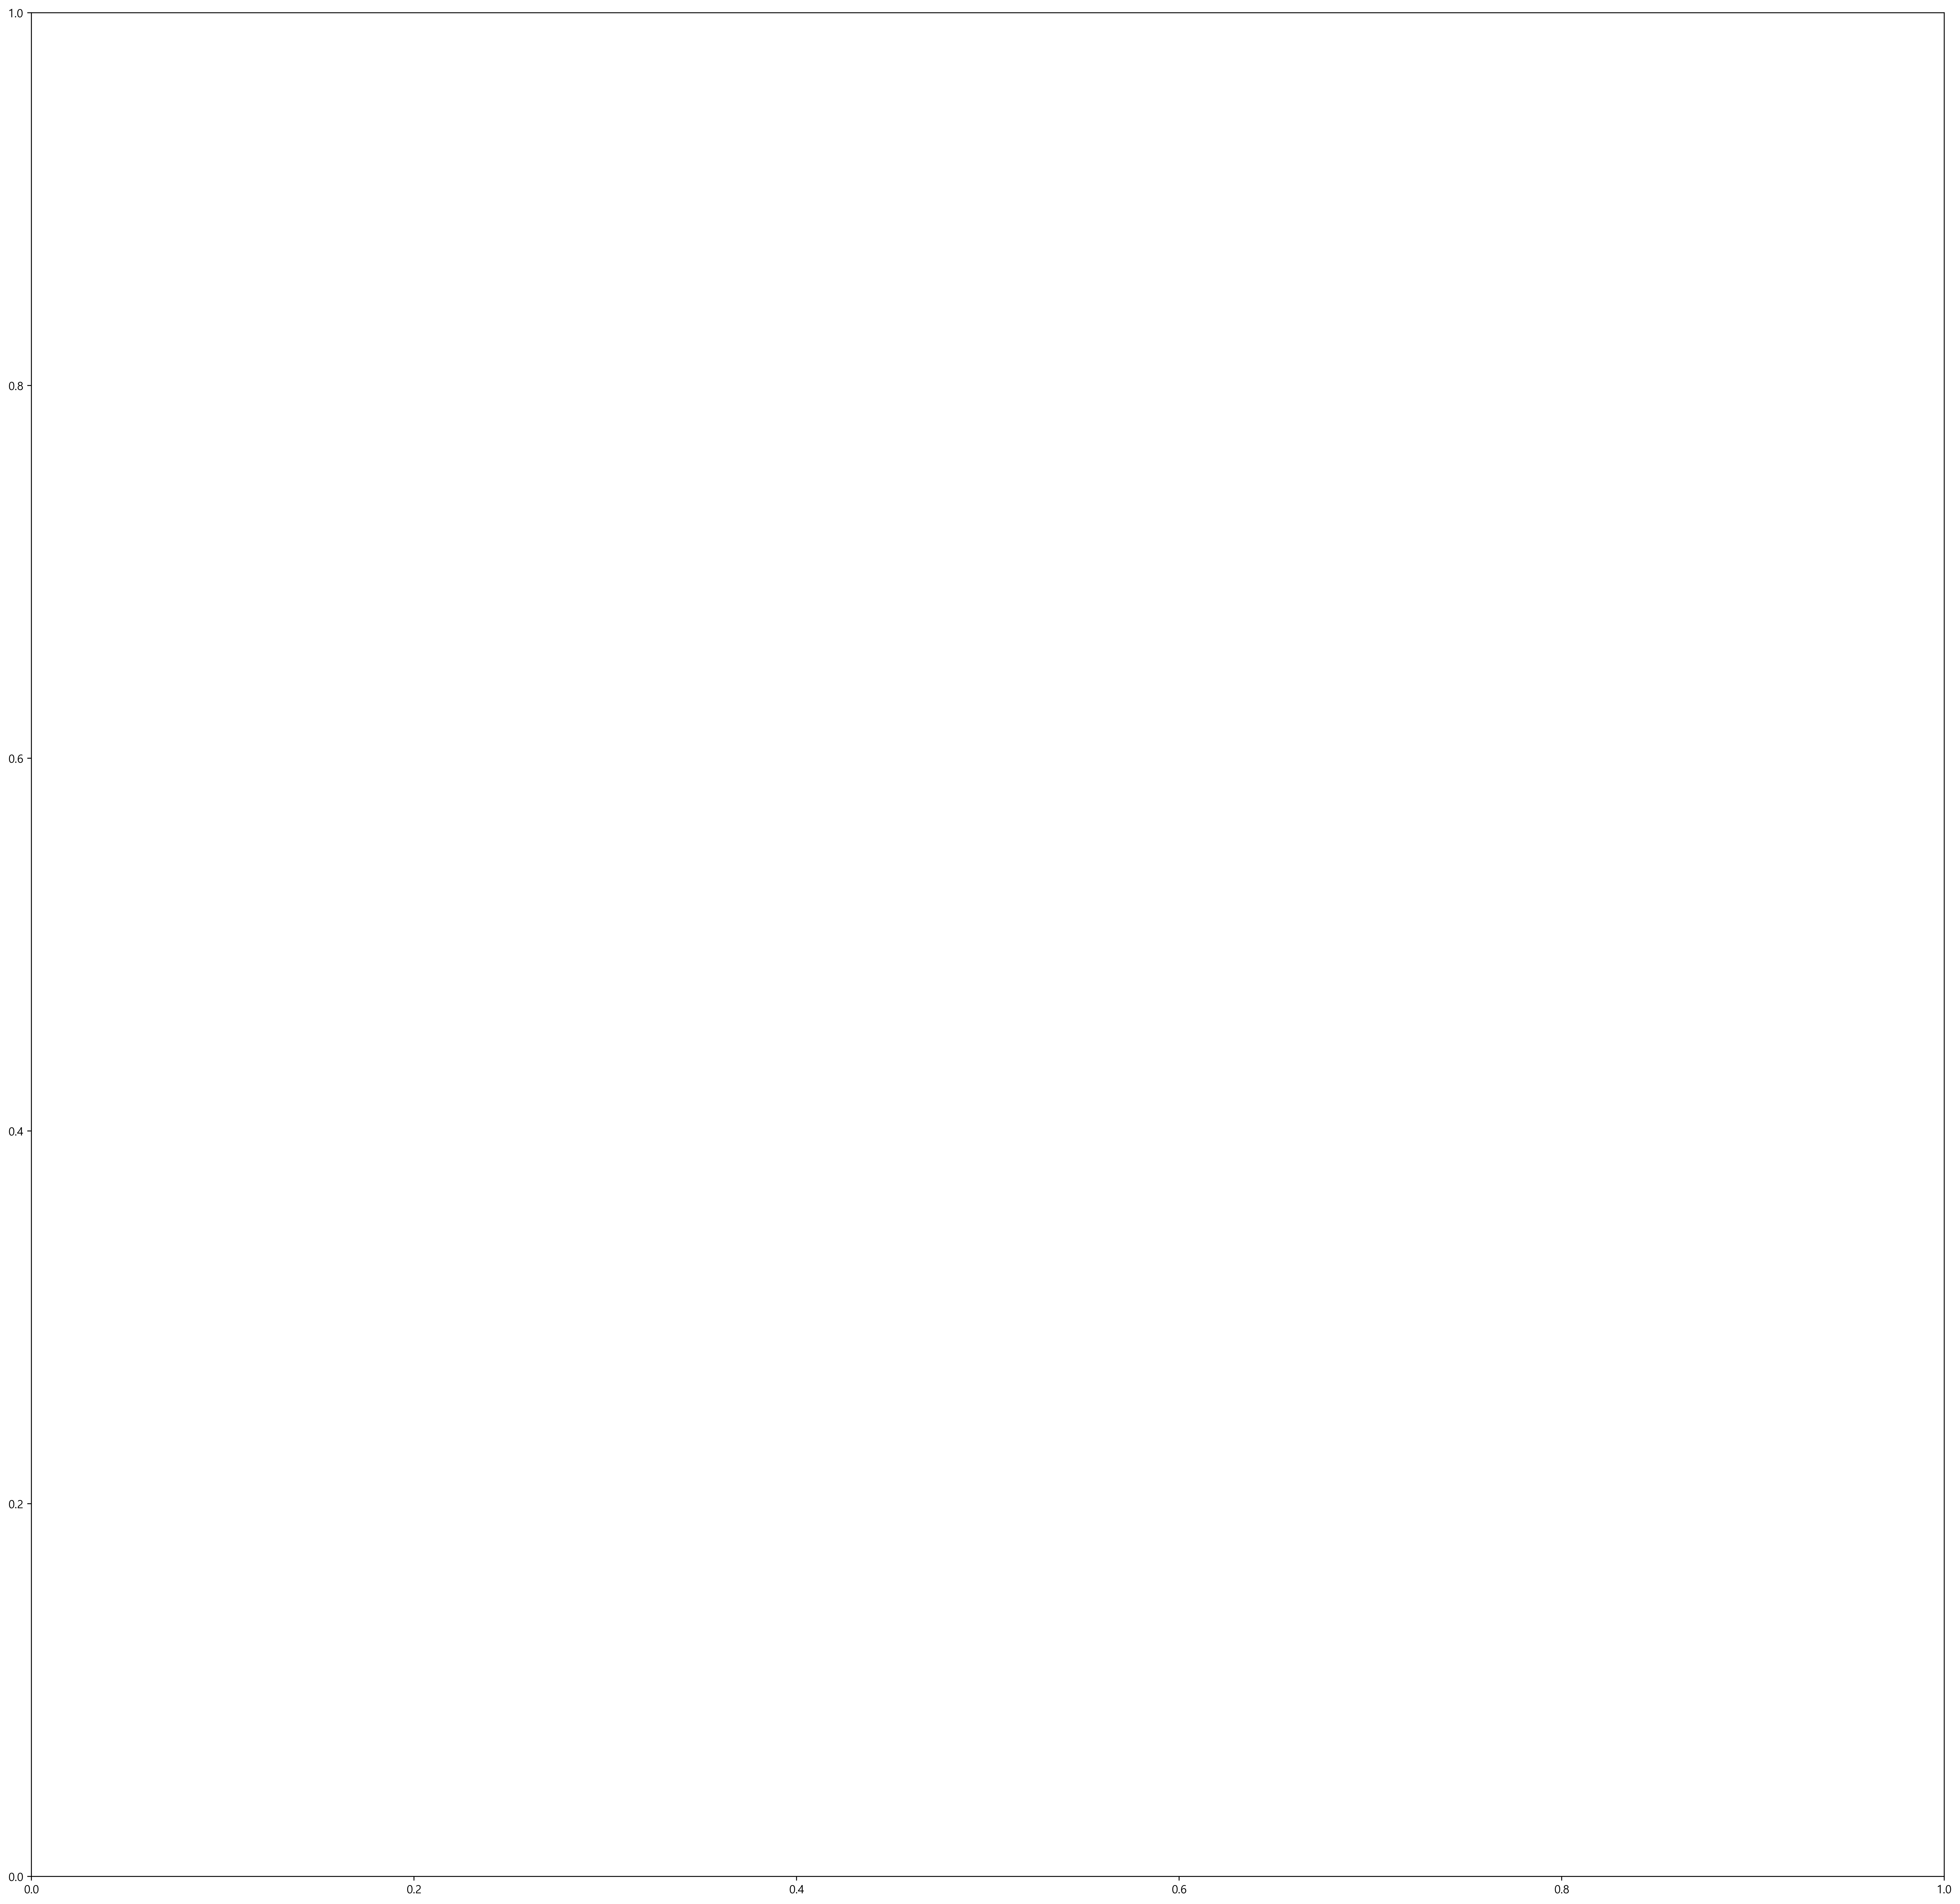

In [166]:
from subprocess import call

call(['dot' , '-Tpng' , 'tree_action.dot' , '-o' , 'tree_action1.png' , '-Gdpi=2000'])

from IPython.display import Image
Image(filename='tree_action1.png')